#About Dataset

 **Context**

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.



**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

*  Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
*  Age: Positive Integer variable of the reviewers age.
*  Title: String variable for the title of the review.
*  Review Text: String variable for the review body.
*  Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
*  Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
*  Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
*  Division Name: Categorical name of the product high level division.
*  Department Name: Categorical name of the product department name.
*  Class Name: Categorical name of the product class name.

#Import Library

In [ ]:
!pip install scikit-plot

In [ ]:
# Import files
import os
import numpy as np
import pandas as pd
import itertools
from scipy.stats import norm, skew, mode
import re
import gc
import string
import warnings
import operator

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

%matplotlib inline

#Import File

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load csv file using pandas
df = pd.read_csv("/content/drive/MyDrive/Womens_Clothing_E-Commerce_Reviews_2.csv")

#Eksplorasi Data

##Analisis Deskriptif

In [ ]:
print ('Number of (rows,columns): ' + str(df.shape) )
df.head()

Number of (rows,columns): (23486, 11)


Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe(include='all')

Unnamed: 0   Clothing ID           Age     Title  \
count   23486.000000  23486.000000  23486.000000     19676   
unique           NaN           NaN           NaN     13993   
top              NaN           NaN           NaN  Love it!   
freq             NaN           NaN           NaN       136   
mean    11742.500000    918.118709     43.198544       NaN   
std      6779.968547    203.298980     12.279544       NaN   
min         0.000000      0.000000     18.000000       NaN   
25%      5871.250000    861.000000     34.000000       NaN   
50%     11742.500000    936.000000     41.000000       NaN   
75%     17613.750000   1078.000000     52.000000       NaN   
max     23485.000000   1205.000000     99.000000       NaN   

                                              Review Text        Rating  \
count                                               22641  23486.000000   
unique                                              22634           NaN   
top     Perfect fit and i've gotten so many compliment...           NaN   
freq                                                    3           NaN   
mean                                                  NaN      4.196032   
std                                                   NaN      1.110031   
min                                                   NaN      1.000000   
25%                                                   NaN      4.000000   
50%                                                   NaN      5.000000   
75%                                                   NaN      5.000000   
max                                                   NaN      5.000000   

        Recommended IND  Positive Feedback Count Division Name  \
count      23486.000000             23486.000000         23472   
unique              NaN                      NaN             3   
top                 NaN                      NaN       General   
freq                NaN                      NaN         13850   
mean           0.822362                 2.535936           NaN   
std            0.382216                 5.702202           NaN   
min            0.000000                 0.000000           NaN   
25%            1.000000                 0.000000           NaN   
50%            1.000000                 1.000000           NaN   
75%            1.000000                 3.000000           NaN   
max            1.000000               122.000000           NaN   

       Department Name Class Name  
count            23472      23472  
unique               6         20  
top               Tops    Dresses  
freq             10468       6319  
mean               NaN        NaN  
std                NaN        NaN  
min                NaN        NaN  
25%                NaN        NaN  
50%                NaN        NaN  
75%                NaN        NaN  
max                NaN        NaN

In [ ]:
# Drop "Unamed: 0" column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
#checking for duplicated entries
duplicates = df.duplicated().sum()

# Menampilkan hasil pemeriksaan
print(f"There are {duplicates} duplicated rows in this data" if duplicates else "There are no duplicated rows in this data")


There are 21 duplicated rows in this data


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(f"Rows in df after dropping duplicates: {df.shape[0]}")

Rows in df after dropping duplicates: 22640


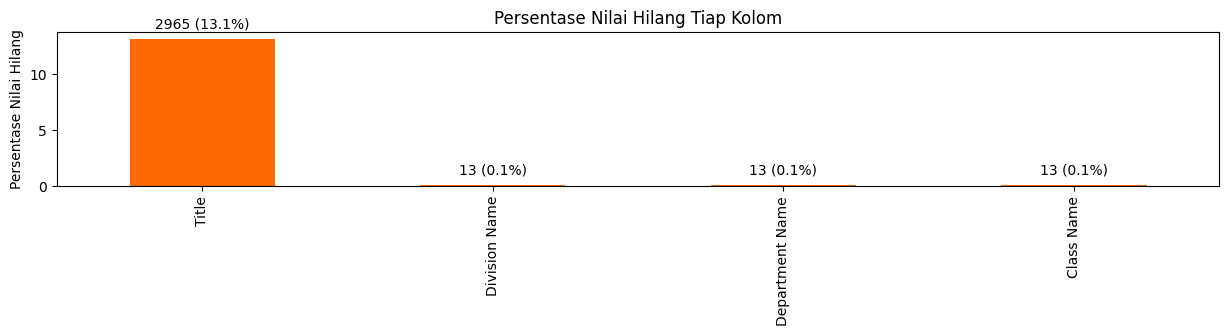

In [ ]:
# Menghitung jumlah dan persentase nilai yang hilang untuk setiap kolom
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Memilih hanya kolom yang memiliki nilai hilang
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 2))
ax = missing_percentages.plot.bar(color='#fd6a01')

# Menambahkan label pada bar plot
for i, percentage in enumerate(missing_percentages):
    ax.text(i, percentage + 1, f"{missing_counts[missing_percentages.index[i]]} ({percentage:.1f}%)", ha='center')

# Menambahkan judul dan label pada sumbu
plt.ylabel("Persentase Nilai Hilang")
plt.title("Persentase Nilai Hilang Tiap Kolom")
plt.show()


In [ ]:
# Delete rows with missing values in "Review Text"
print("Rows before deleting missing values in review text: ", df.shape[0])
df.dropna(subset=['Review Text'], inplace=True)
print("Rows after deleting missing values in review text: ", df.shape[0])

Rows before deleting missing values in review text:  22640
Rows after deleting missing values in review text:  22640


In [ ]:
# Mengisi nilai yang hilang dengan ' ' untuk kolom 'Title' dan 'Blank' untuk kolom lainnya
for c in missing_percentages.index:
    fill_value = ' ' if c == 'Title' else 'Blank'
    df[c] = df[c].fillna(fill_value)

df.isna().sum().sum()

0

##Visualisasi Data

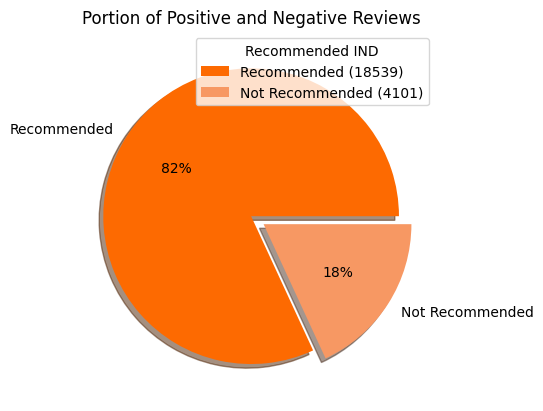

In [ ]:
# Menghitung ukuran setiap kategori dalam 'Recommended IND'
sizes = df['Recommended IND'].value_counts()
labels = ["Recommended", "Not Recommended"]
explode = (0, 0.1)  # Mengeluarkan potongan kedua sebesar 10%
colors = ['#fd6a01', '#f79863']

# Membuat pie chart
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.0f%%', colors=colors)
plt.title('Portion of Positive and Negative Reviews')
plt.legend(title="Recommended IND", loc="upper right", labels=[f"Recommended ({sizes[1]})", f"Not Recommended ({sizes[0]})"])
plt.show()


In [ ]:
# Check total Cloth items in dataset
print("Clothing Item Counts in dataset: ", len(df["Clothing ID"].unique()))

Clothing Item Counts in dataset:  1179


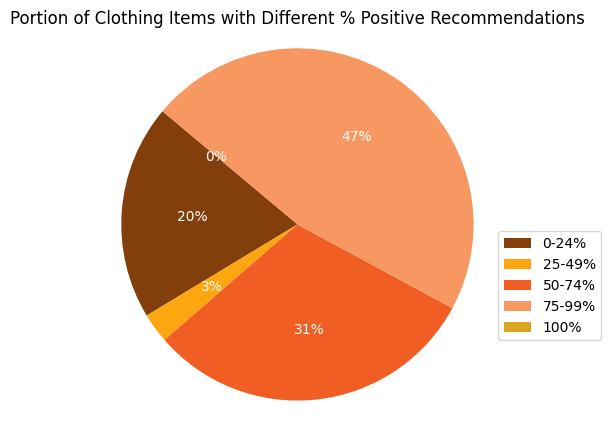

In [ ]:
# Menghitung persentase rekomendasi positif untuk setiap item pakaian
positive_percentage = df.groupby('Clothing ID')['Recommended IND'].mean() * 100

# Mengelompokkan data ke dalam rentang yang ditentukan
bins = [0, 25, 50, 75, 99, 100]
labels = ['0-24%', '25-49%', '50-74%', '75-99%', '100%']
binned_percentage = pd.cut(positive_percentage, bins=bins, labels=labels, right=False)

# Menghitung proporsi item yang jatuh ke setiap bin
percentage_counts = binned_percentage.value_counts(normalize=True) * 100
counts = binned_percentage.value_counts()
data = pd.DataFrame({'Percentage': percentage_counts, 'Count': counts}).reindex(labels)

# Pie Chart
colors = ['#823f0c', '#fda60f', '#f05e23', '#f79863', '#daa520']
plt.figure(figsize=(5, 5))
plt.pie(data['Percentage'], labels=data.index, autopct='%1.0f%%', colors=colors, textprops={'color': 'white'}, startangle=140)
plt.title('Portion of Clothing Items with Different % Positive Recommendations')
plt.axis('equal')  # Aspek rasio sama memastikan pie digambar sebagai lingkaran
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
# Mengidentifikasi fitur kontinu, diskrit, dan teks
col_text = ['Review Text', 'Title']
col_disc = [c for c in df.columns if df[c].dtype == 'object' or c in ['Rating', 'Recommended IND'] and c not in col_text]
col_cont = [c for c in df.columns if c not in col_text + col_disc]

# Menampilkan fitur
print(f"Continuous features:\n{col_cont}")
print(f"Discrete features:\n{col_disc}")
print(f"Text features:\n{col_text}")


Continuous features:
['Clothing ID', 'Age', 'Positive Feedback Count']
Discrete features:
['Title', 'Review Text', 'Rating', 'Recommended IND', 'Division Name', 'Department Name', 'Class Name']
Text features:
['Review Text', 'Title']


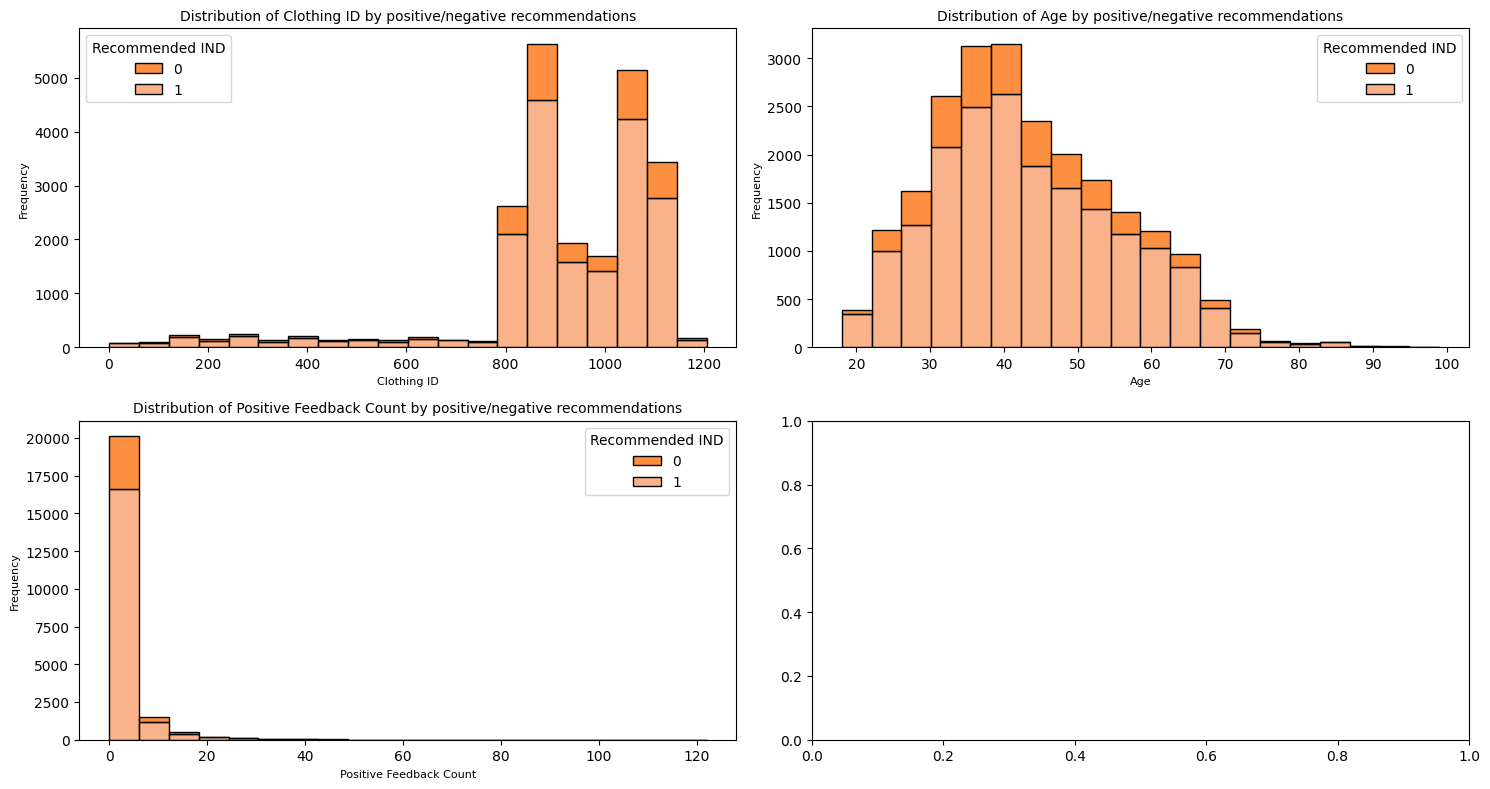

In [ ]:
# Mengabaikan peringatan tipe FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for idx, feature in enumerate(col_cont):
    row = idx // 2
    col = idx % 2

    ax = axes[row, col]  # Akses subplot yang sesuai
    sns.histplot(data=df, x=feature, hue='Recommended IND', bins=20, ax=ax,
                 palette=['#fd6a01', '#f79863'], multiple='stack')
    ax.set_title(f'Distribution of {feature} by positive/negative recommendations', fontsize=10)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()


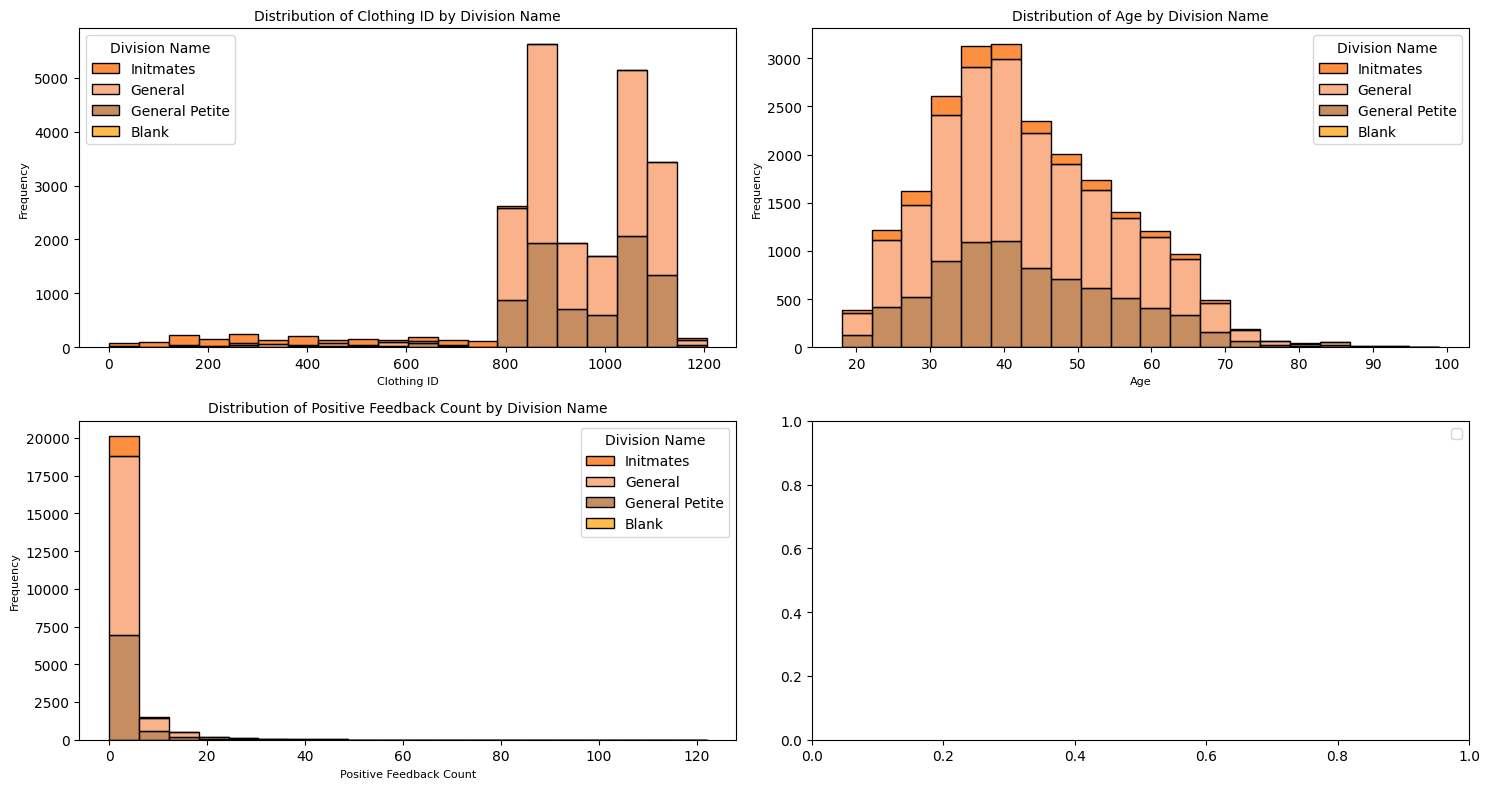

In [ ]:
# Mengabaikan peringatan tipe FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for idx, feature in enumerate(col_cont):
    row = idx // 2
    col = idx % 2

    ax = axes[row, col]  # Akses subplot yang sesuai
    sns.histplot(data=df, x=feature, hue='Division Name', bins=20, ax=ax,
                 palette=['#fd6a01', '#f79863', '#b3672b', '#fda60f'], multiple='stack')
    ax.set_title(f'Distribution of {feature} by Division Name', fontsize=10)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()


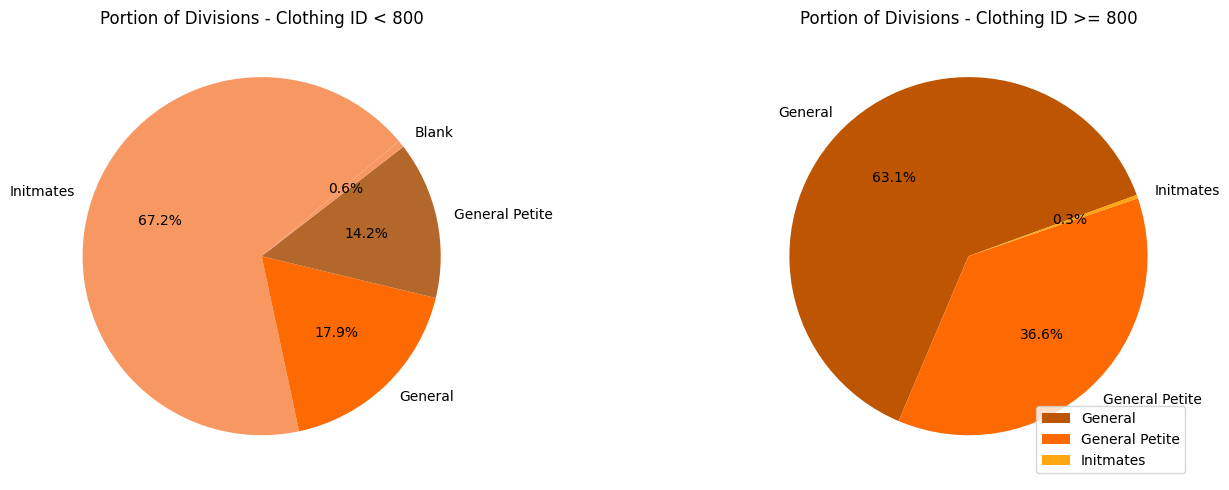

In [ ]:
# Membagi data menjadi dua berdasarkan Clothing ID
df_clothing_0 = df[df['Clothing ID'] < 800]
df_clothing_1 = df[df['Clothing ID'] >= 800]

# Mengatur warna untuk setiap pie chart
colors_0 = ['#f79863', '#fd6a01', '#b3672b']
colors_1 = ['#be5503', '#fd6a01', '#fda60f']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, df_clothing in enumerate([df_clothing_0, df_clothing_1]):
    clothing = df_clothing['Division Name'].value_counts()
    ax = axes[idx]
    ax.pie(clothing, labels=clothing.index, autopct='%1.1f%%', colors=colors_0 if idx == 0 else colors_1, startangle=40 if idx == 0 else 20)
    ax.set_title(f'Portion of Divisions - Clothing ID {"< 800" if idx == 0 else ">= 800"}')

plt.legend()  # Menambahkan legenda
plt.tight_layout()
plt.show()


In [ ]:
# unique "Title"
len(df.Title.unique())
print(df['Title'].head())

0                           
1                           
2    Some major design flaws
3           My favorite buy!
4           Flattering shirt
Name: Title, dtype: object


#Pra-Pemrosesan Data

In [ ]:
# Train/Test Split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(f"There are {train.shape[0]} rows in training data")
print(f"There are {test.shape[0]} rows in testing data")

There are 18112 rows in training data
There are 4528 rows in testing data


In [ ]:
# Look at texts
print('********************************Recommended texts********************************')
print(train[train['Recommended IND']== 1]['Review Text'].iloc[0],'\n')

print('********************************Not Recommended texts********************************')
print(train[train['Recommended IND']==0]['Review Text'].iloc[0],'\n')

********************************Recommended texts********************************
I love this! the contrast in much prettier in person. 

********************************Not Recommended texts********************************
Much lower quality than other robes i have purchased 



Skewness and Kurtosis of 'Message Length' for Negative Reviews:
skew   -0.077478
kurt   -1.195665
Name: message_length, dtype: float64
Skewness and Kurtosis of 'Message Length' for Positive Reviews:
skew   -0.020085
kurt   -1.259232
Name: message_length, dtype: float64


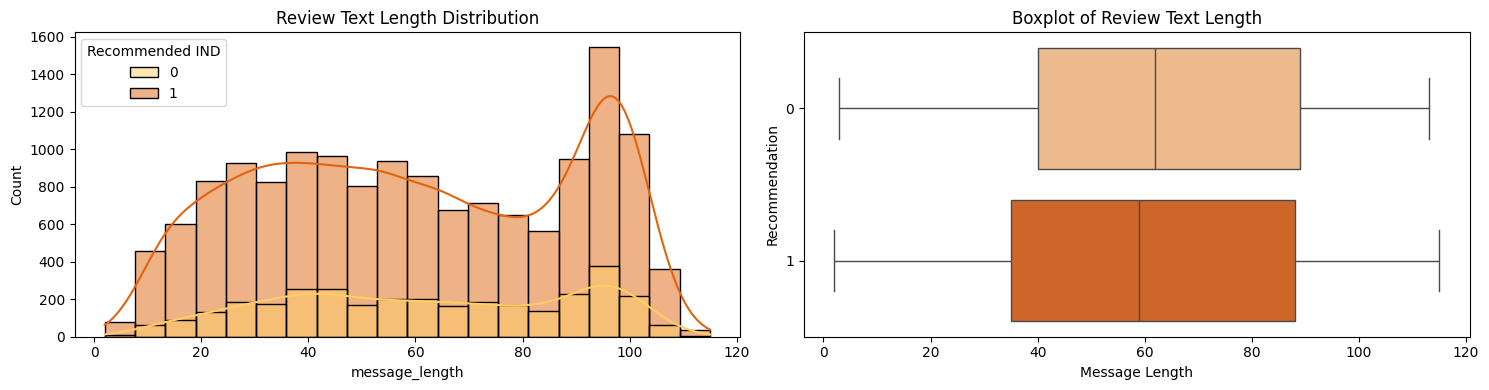

In [ ]:
def plot_message_length(df):
    df['message_length'] = df['Review Text'].apply(lambda x: len(x.split(" ")))
    print("Skewness and Kurtosis of 'Message Length' for Negative Reviews:")
    print(df[df['Recommended IND'] == 0]['message_length'].agg(['skew', 'kurt']))
    print("Skewness and Kurtosis of 'Message Length' for Positive Reviews:")
    print(df[df['Recommended IND'] == 1]['message_length'].agg(['skew', 'kurt']))

    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df, x='message_length', hue='Recommended IND', kde=True, bins=20,
                 palette='YlOrBr')  # Menggunakan palet bawaan seaborn
    plt.title("Review Text Length Distribution")

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y='Recommended IND', x='message_length', palette='Oranges', orient='h')  # Menggunakan palet bawaan seaborn
    plt.xlabel('Message Length')
    plt.ylabel('Recommendation')
    plt.title("Boxplot of Review Text Length")

    plt.tight_layout()
    plt.show()

plot_message_length(train)


Unique Words in Training: 33862
Unique Words in Testing: 15338
Unique Words in Testing not in Training: 4611
Unique Words in Training not in Testing: 23135
Unique Words in Both Training and Testing: 10727


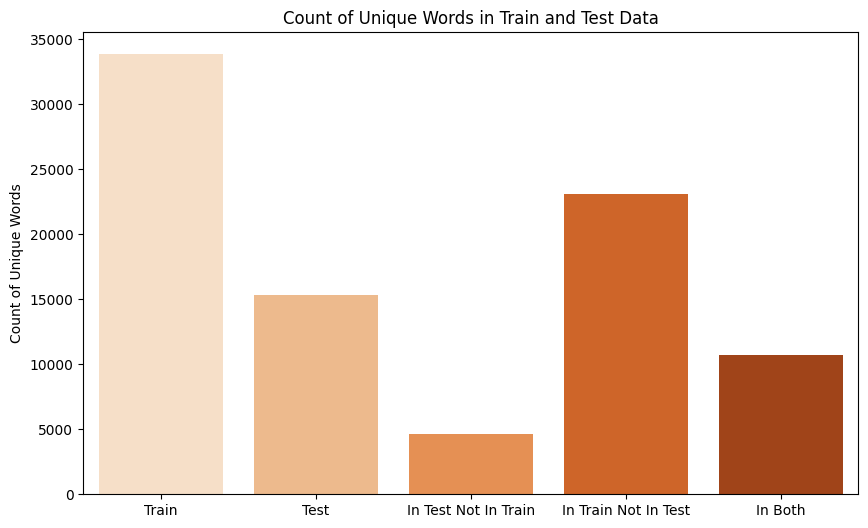

Some sample words in testing not in training:
 ['correct....it', 'shift/swing', 'fitted/tight', 'one-off.', 'spiffy', 'sortof', 'summer-like.', '(none', 'squirrel.', "pj's.", 'ast', 'these?', '"super', 'bar,', 'color.)', 'defected', 'perfectionist', 'myself)', 'vegas', 'aame', 'lats,', 'screaming:', 'cheesecake', '36g', 'mortif', 'goodbye', '34b/32c,', 'perfect...the', 'synthetic.the', 'small.)', 'agreed)...', "5'4',", '-shirt', 'online.it', 're-imagined', 'calia', 'owe', 'close-fit', 'canadian', 'matte.', 'brightening,', 'pictured/described', 'xspetite;', 'fringe-like', '"wing', 'though,a', '(obviously', 'expected...and', 'that&amp;#39;s', 'orphan', 'depicted,', 'short!!!),', 'mateiral,', 'lbs=', "36'", 'cut/alteration', 'yuck!', 'purposeful.', 'snuggy', 'hlding', '33.5"', 'bearable.', '133,', 'ooohed', '(width),', 'ups,', 'fau-', 'begin....this', 'others.)', 'fussy,', 'minneapolis', 'spring/fall,', 'reason(you', 'w/fact', 'guazy', 'suprise,', '(extremely', 'gap,', 'gal)', 'compliment

33862

In [ ]:
def unique_words_train_test(col):
    # Menghitung jumlah kata unik di data pelatihan dan pengujian
    unique_words_train = len(train[col].str.split().explode().unique())
    unique_words_test = len(test[col].str.split().explode().unique())

    # Mengidentifikasi kata-kata unik di data pengujian yang tidak ada di data pelatihan
    words_in_test_not_train = set(test[col].str.split().explode().unique()) - set(train[col].str.split().explode().unique())

    # Mengidentifikasi kata-kata unik di data pelatihan yang tidak ada di data pengujian
    words_in_train_not_test = set(train[col].str.split().explode().unique()) - set(test[col].str.split().explode().unique())

    # Kata-kata unik yang muncul di kedua kumpulan data
    words_in_both_train_and_test = set(train[col].str.split().explode().unique())&set(test[col].str.split().explode().unique())

    # Menampilkan beberapa output
    print("Unique Words in Training:", unique_words_train)
    print("Unique Words in Testing:", unique_words_test)
    print("Unique Words in Testing not in Training:", len(words_in_test_not_train))
    print("Unique Words in Training not in Testing:", len(words_in_train_not_test))
    print("Unique Words in Both Training and Testing:", len(words_in_both_train_and_test))

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=['Train', 'Test', 'In Test Not In Train', 'In Train Not In Test', 'In Both'],
                y=[unique_words_train, unique_words_test, len(words_in_test_not_train), len(words_in_train_not_test), len(words_in_both_train_and_test)],
                palette='Oranges')
    plt.title('Count of Unique Words in Train and Test Data')
    plt.ylabel('Count of Unique Words')
    plt.show()

    # Menampilkan beberapa kata sampel yang ada di data pengujian tetapi tidak ada di data pelatihan
    print("Some sample words in testing not in training:\n", list(words_in_test_not_train)[:300])

    return unique_words_train

unique_words_train_test('Review Text')


word_count: number of words in text
unique_word_count: number of unique words in text
stop_word_count: number of stop words in text
url_count: number of urls in text
mean_word_length: average character count in words
char_count:number of characters in text
punctuation_count: number of punctuations in text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
import string
import numpy as np

# Inisialisasi stopwords dari NLTK
stop_words = set(nltk.corpus.stopwords.words('english'))

# Fungsi untuk menghitung jumlah kata dalam teks
def count_words(text):
    return len(str(text).split())

# Fungsi untuk menghitung jumlah kata unik dalam teks
def count_unique_words(text):
    return len(set(str(text).split()))

# Fungsi untuk menghitung jumlah stopwords dalam teks
def count_stop_words(text):
    return len([w for w in str(text).lower().split() if w in stop_words])

# Fungsi untuk menghitung panjang rata-rata kata dalam teks
def mean_word_length(text):
    words = str(text).split()
    return np.mean([len(w) for w in words]) if words else 0

# Fungsi untuk menghitung jumlah karakter dalam teks
def count_characters(text):
    return len(str(text))

# Fungsi untuk menghitung jumlah tanda baca dalam teks
def count_punctuation(text):
    return len([c for c in str(text) if c in string.punctuation])

# Menerapkan fungsi-fungsi di atas ke setiap data pelatihan dan pengujian
train['word_count'] = train['Review Text'].apply(count_words)
train['unique_word_count'] = train['Review Text'].apply(count_unique_words)
train['stop_word_count'] = train['Review Text'].apply(count_stop_words)
train['mean_word_length'] = train['Review Text'].apply(mean_word_length)
train['char_count'] = train['Review Text'].apply(count_characters)
train['punctuation_count'] = train['Review Text'].apply(count_punctuation)

test['word_count'] = test['Review Text'].apply(count_words)
test['unique_word_count'] = test['Review Text'].apply(count_unique_words)
test['stop_word_count'] = test['Review Text'].apply(count_stop_words)
test['mean_word_length'] = test['Review Text'].apply(mean_word_length)
test['char_count'] = test['Review Text'].apply(count_characters)
test['punctuation_count'] = test['Review Text'].apply(count_punctuation)


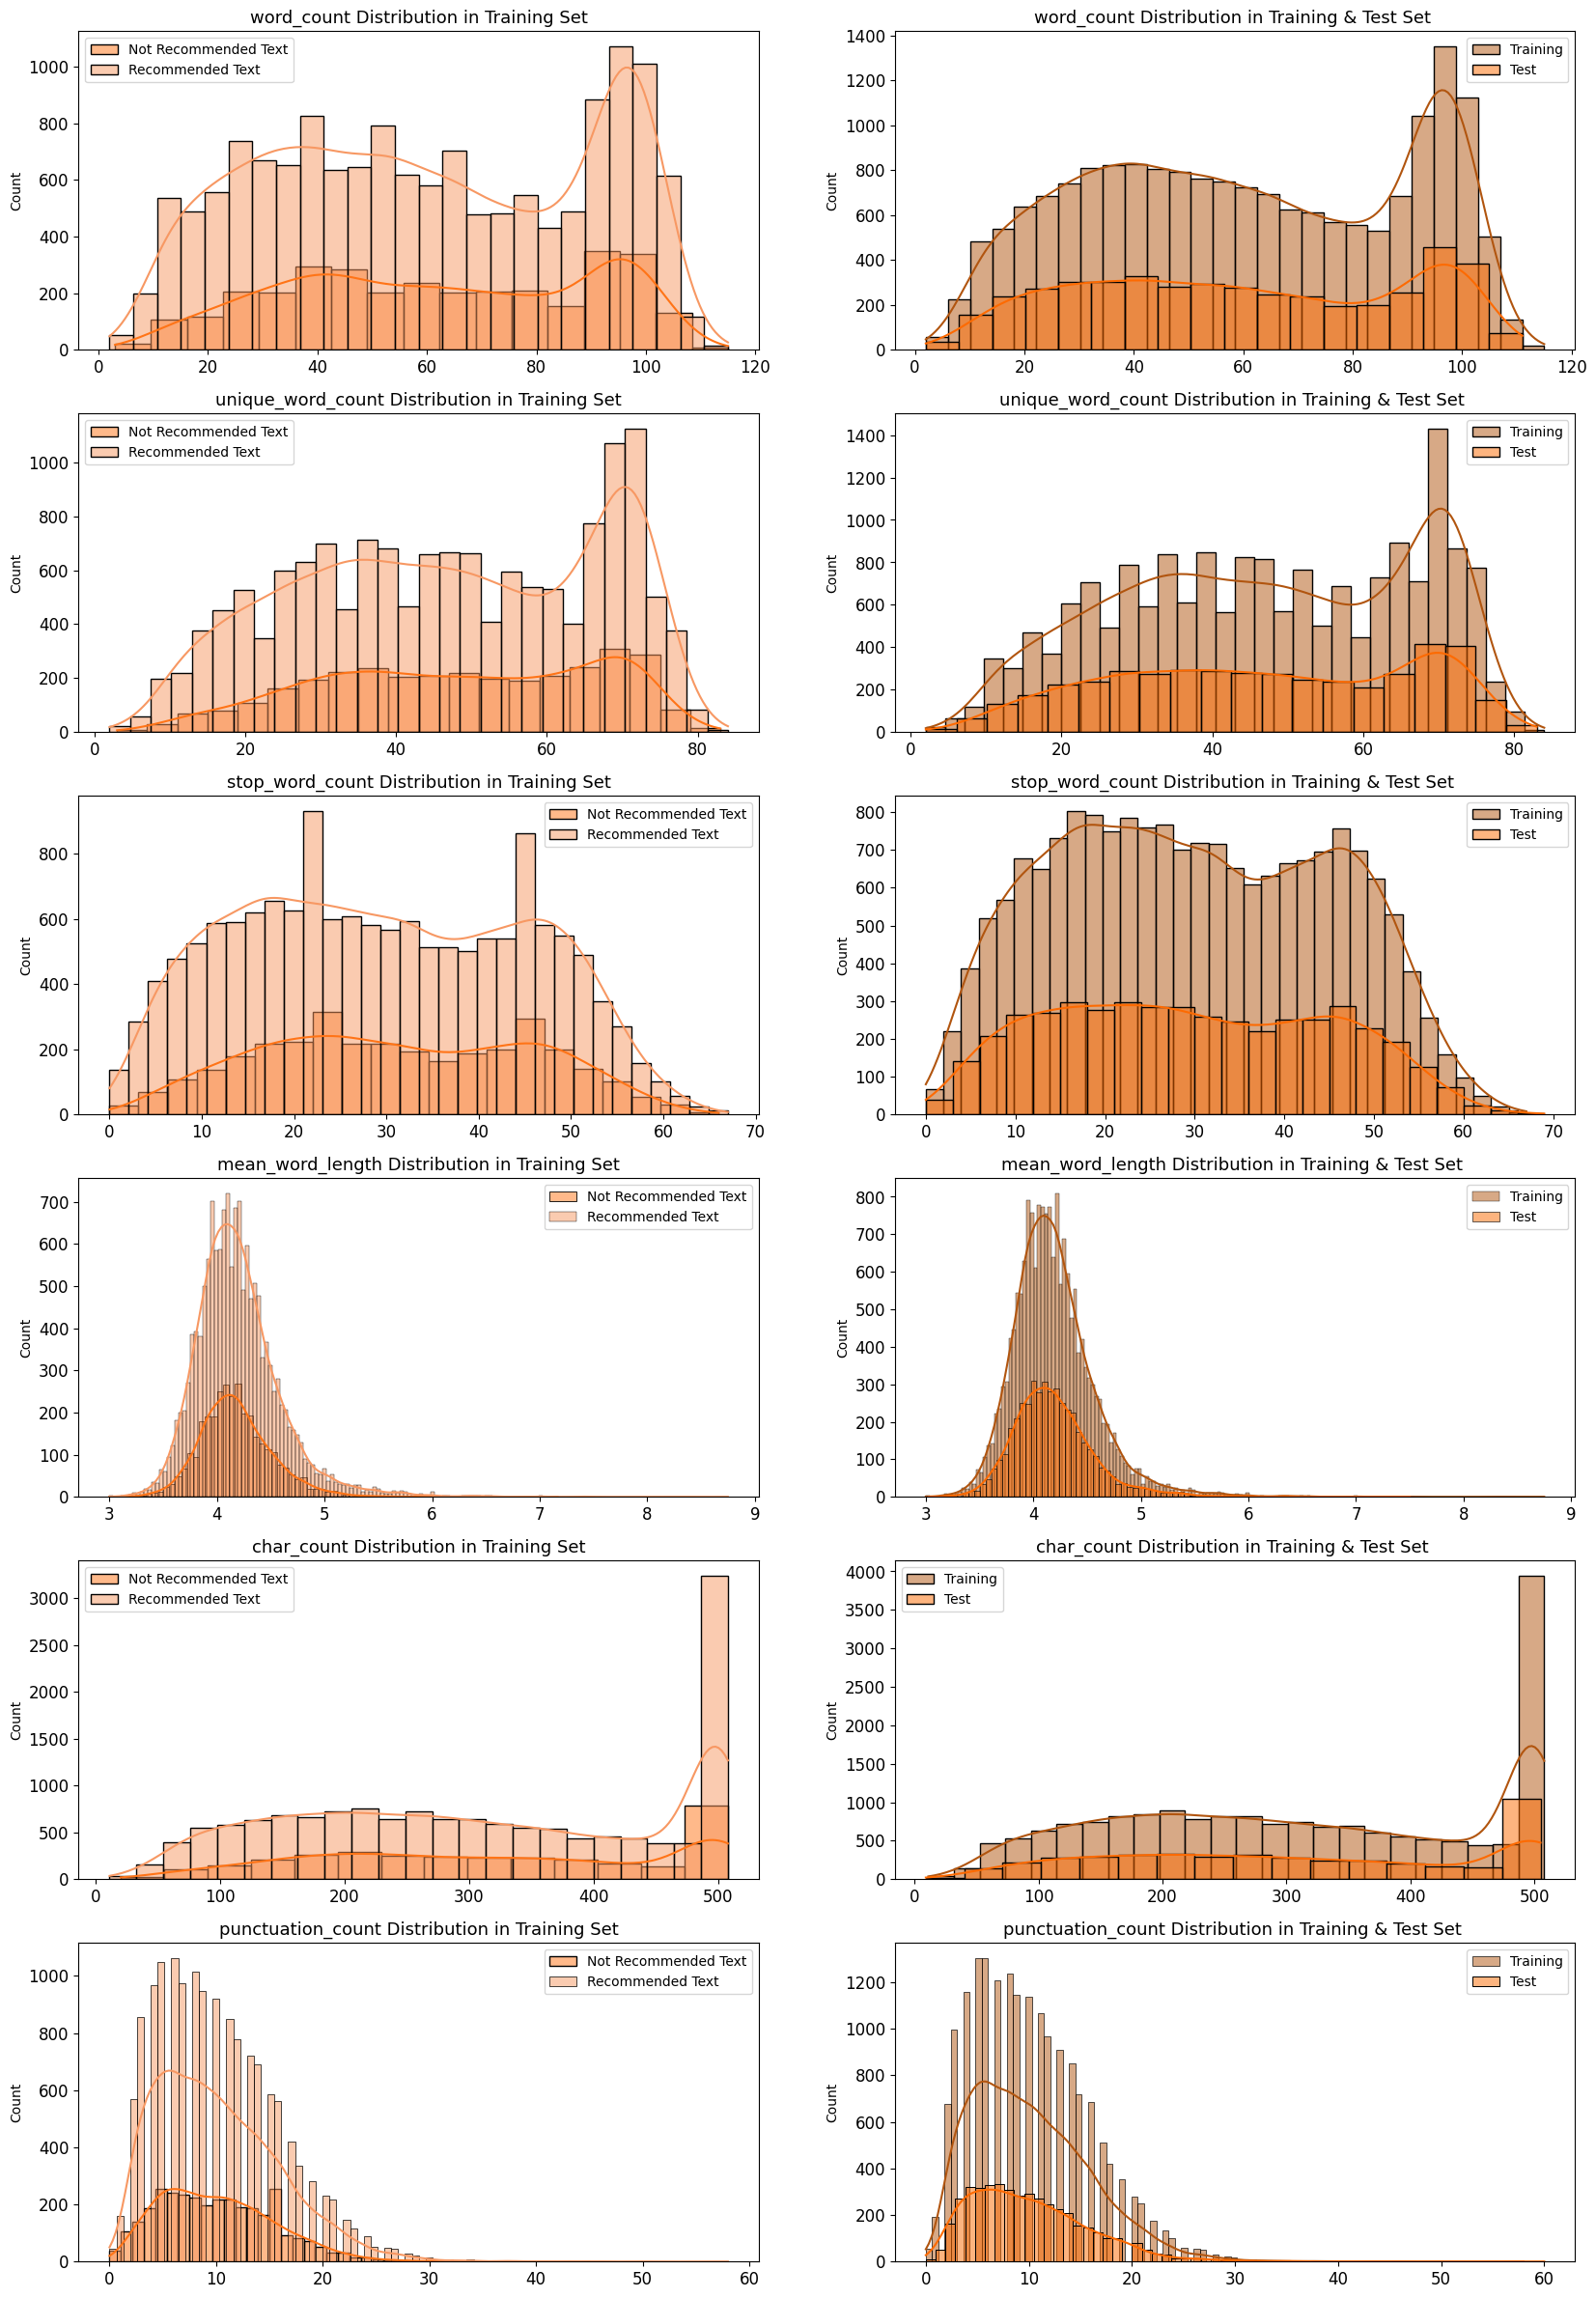

In [ ]:
import warnings

# Menyembunyikan FutureWarning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

# Daftar meta-fitur
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count',  'mean_word_length',
                'char_count', 'punctuation_count']

# Filter untuk ulasan yang direkomendasikan
RECOMMENDED = train['Recommended IND'] == 1

# Membuat subplot untuk setiap meta-fitur
fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 30), dpi=100)

# Melakukan iterasi melalui setiap meta-fitur
for i, feature in enumerate(METAFEATURES):
    # Histogram untuk teks yang tidak direkomendasikan
    sns.histplot(train.loc[~RECOMMENDED][feature], label='Not Recommended Text', ax=axes[i][0], color='#ff7417', kde=True)
    # Histogram untuk teks yang direkomendasikan
    sns.histplot(train.loc[RECOMMENDED][feature], label='Recommended Text', ax=axes[i][0], color='#f79863', kde=True)
    # Histogram untuk data pelatihan
    sns.histplot(train[feature], label='Training', ax=axes[i][1], color='#b1550f', kde=True)
    # Histogram untuk data pengujian
    sns.histplot(test[feature], label='Test', ax=axes[i][1], color='#fd6a01', kde=True)

    # Menyesuaikan parameter axis
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()

    # Menyertakan judul untuk setiap subplot
    axes[i][0].set_title(f'{feature} Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Distribution in Training & Test Set ', fontsize=13)

plt.show()


In [ ]:
def ngram_freqplot(df, color='orange', target=" "):
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i, ax in enumerate(axs, 1):
        # Menghitung n-gram menggunakan CountVectorizer
        vectorizer = CountVectorizer(ngram_range=(i, i), stop_words='english')
        ngram_train = vectorizer.fit_transform(df['Review Text'])

        # Menghitung frekuensi setiap n-gram dan menyimpannya dalam kamus
        ngram_freq = ngram_train.sum(axis=0)
        feature_names = vectorizer.get_feature_names_out()
        ngram_dict = {feature_names[j]: ngram_freq[0, j] for j in range(len(feature_names))}

        # Memfilter n-gram yang mengandung URL
        ngram_dict = {ngram: freq for ngram, freq in ngram_dict.items() if not re.match(r'(http|https)', ngram)}

        sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)

        # Top n-gram
        top_n = 30  # Sesuaikan jumlah top n-gram yang ingin Anda plot
        top_ngrams = [item[0] for item in sorted_ngrams[:top_n]]
        top_frequencies = [item[1] for item in sorted_ngrams[:top_n]]

        # Plot batang
        ax.barh(top_ngrams, top_frequencies, color=color)
        ax.set_title(f'{target} tweet top 30 {i}-gram ')
        ax.invert_yaxis()  # menginginkan frekuensi tertinggi di bagian atas
        ax.tick_params(axis='x')

        # Ukuran font untuk kata-kata
        for tick in ax.get_yticklabels():
            tick.set_fontsize(15)
    plt.tight_layout()


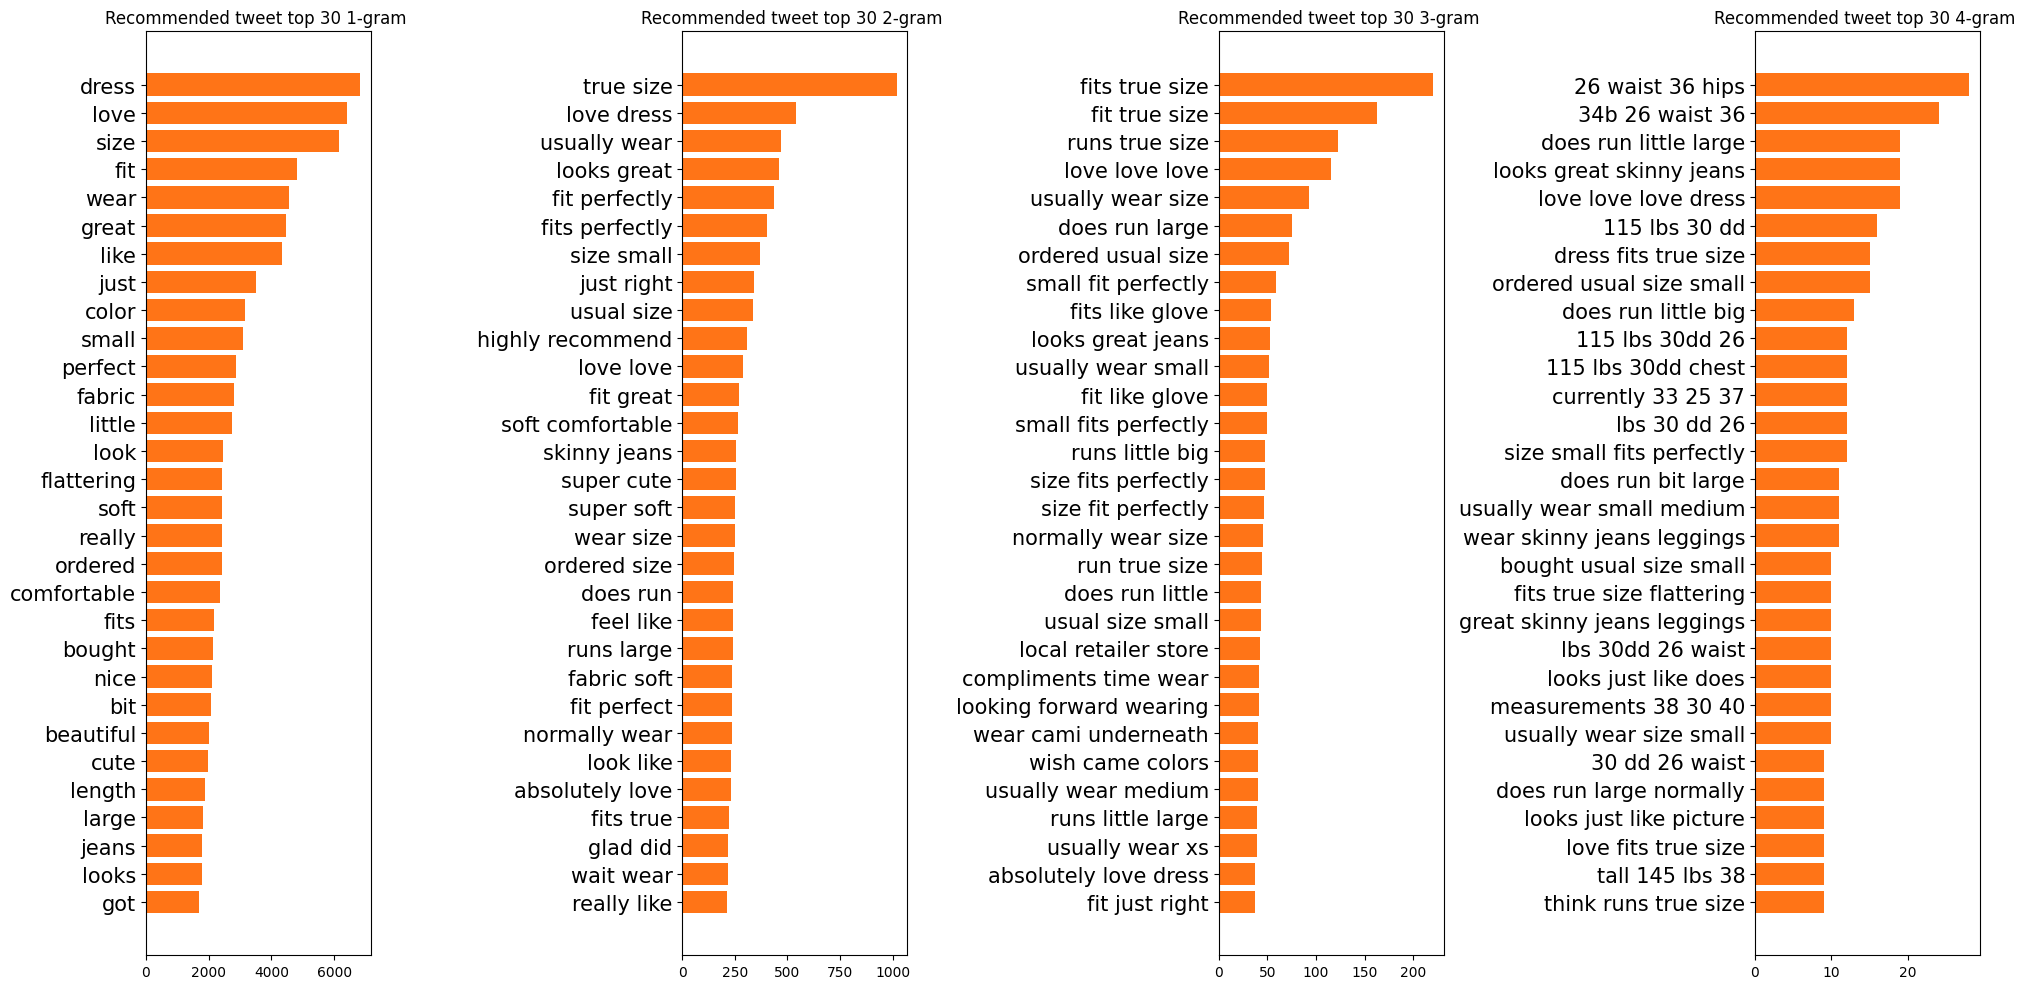

In [ ]:
# Recommended Text
ngram_freqplot(train[train['Recommended IND']==1], color='#ff7417', target="Recommended")

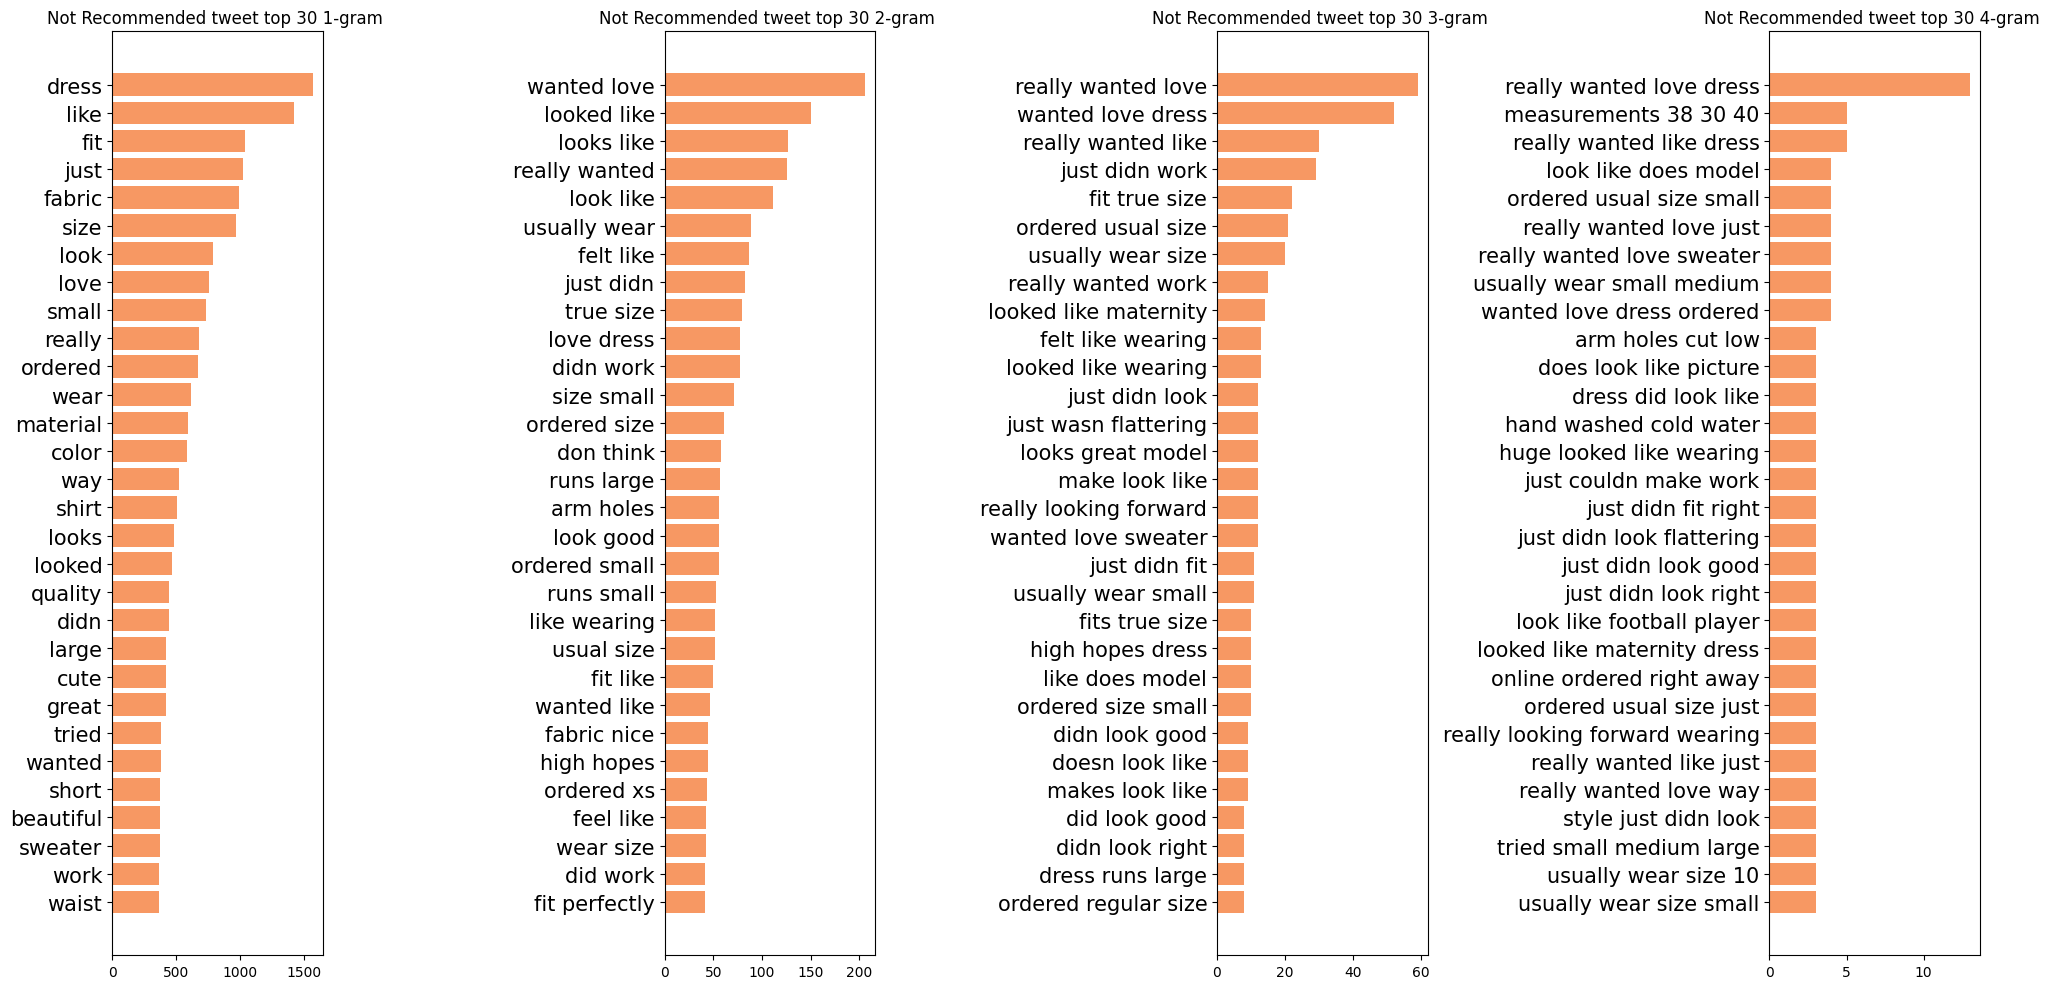

In [ ]:
# Not Recommended Text
ngram_freqplot(train[train['Recommended IND']==0], color='#f79863', target="Not Recommended")

###Punctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#punctuation_removal removes all punctuation from a string
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [ ]:
df['Review Text'] = df['Review Text'].apply(punctuation_removal)
df['Review Text'].head()

0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

###StopWords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


In [ ]:
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [ ]:
df['Review Text'] = df['Review Text'].apply(stopwords_removal)
df['Review Text'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, sooo, pretty, happened, find, store, im...
2    [high, hopes, really, wanted, work, initially,...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [flattering, due, adjustable, front, tie, perf...
Name: Review Text, dtype: object

In [ ]:
def drop_numbers(nos):
    rem_nos = []
    for i in nos:
        if not re.search('\d', i):
            rem_nos.append(i)
    return ' '.join(rem_nos)

In [ ]:
df['Review Text'] = df['Review Text'].apply(drop_numbers)
df['Review Text'].head()

0          absolutely wonderful silky sexy comfortable
1    love sooo pretty happened find store im glad b...
2    high hopes really wanted work initially ordere...
3    love love love jumpsuit fun flirty fabulous ev...
4    flattering due adjustable front tie perfect le...
Name: Review Text, dtype: object

In [ ]:
df['Review']= df['Review Text']
df['Review'].head()

0          absolutely wonderful silky sexy comfortable
1    love sooo pretty happened find store im glad b...
2    high hopes really wanted work initially ordere...
3    love love love jumpsuit fun flirty fabulous ev...
4    flattering due adjustable front tie perfect le...
Name: Review, dtype: object

In [ ]:
df.rename(columns={'Recommended IND': 'Recommended'}, inplace=True)

df.head()

Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended  \
0        absolutely wonderful silky sexy comfortable       4            1   
1  love sooo pretty happened find store im glad b...       5            1   
2  high hopes really wanted work initially ordere...       3            0   
3  love love love jumpsuit fun flirty fabulous ev...       5            1   
4  flattering due adjustable front tie perfect le...       5            1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

                                              Review  
0        absolutely wonderful silky sexy comfortable  
1  love sooo pretty happened find store im glad b...  
2  high hopes really wanted work initially ordere...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  flattering due adjustable front tie perfect le...

In [ ]:
cols = ['Clothing ID', 'Age','Review', 'Recommended',	'Positive Feedback Count']
df = df[cols]
df = df.dropna()
print(df.shape)
df.head()

(22640, 6)


Clothing ID  Age                                             Review  \
0          767   33        absolutely wonderful silky sexy comfortable   
1         1080   34  love sooo pretty happened find store im glad b...   
2         1077   60  high hopes really wanted work initially ordere...   
3         1049   50  love love love jumpsuit fun flirty fabulous ev...   
4          847   47  flattering due adjustable front tie perfect le...   

   Rating  Recommended  Positive Feedback Count  
0       4            1                        0  
1       5            1                        4  
2       3            0                        0  
3       5            1                        0  
4       5            1                        6

In [ ]:
df['Sentiment'] = ['positif' if x==1 else 'negatif' for x in df.Recommended]
print(df.shape)
df.head()

(22640, 7)


Clothing ID  Age                                             Review  \
0          767   33        absolutely wonderful silky sexy comfortable   
1         1080   34  love sooo pretty happened find store im glad b...   
2         1077   60  high hopes really wanted work initially ordere...   
3         1049   50  love love love jumpsuit fun flirty fabulous ev...   
4          847   47  flattering due adjustable front tie perfect le...   

   Rating  Recommended  Positive Feedback Count Sentiment  
0       4            1                        0   positif  
1       5            1                        4   positif  
2       3            0                        0   negatif  
3       5            1                        0   positif  
4       5            1                        6   positif

In [ ]:
pth="/content/drive/MyDrive/"

In [ ]:
#save to csv
df.to_csv(pth+'Data after Prepo.csv',index=False)

##Word Cloud (After Text Prepocessing)

In [ ]:
pos_df = df[df.Recommended == 1]
neg_df = df[df.Recommended == 0]
pos_df.head()

Clothing ID  Age                                             Review  \
0          767   33        absolutely wonderful silky sexy comfortable   
1         1080   34  love sooo pretty happened find store im glad b...   
3         1049   50  love love love jumpsuit fun flirty fabulous ev...   
4          847   47  flattering due adjustable front tie perfect le...   
6          858   39  aded basket hte last mintue see would look lik...   

   Rating  Recommended  Positive Feedback Count Sentiment  
0       4            1                        0   positif  
1       5            1                        4   positif  
3       5            1                        0   positif  
4       5            1                        6   positif  
6       5            1                        1   positif

In [ ]:
pos_words = ' '.join(pos_df.Review)
neg_words = ' '.join(neg_df.Review)

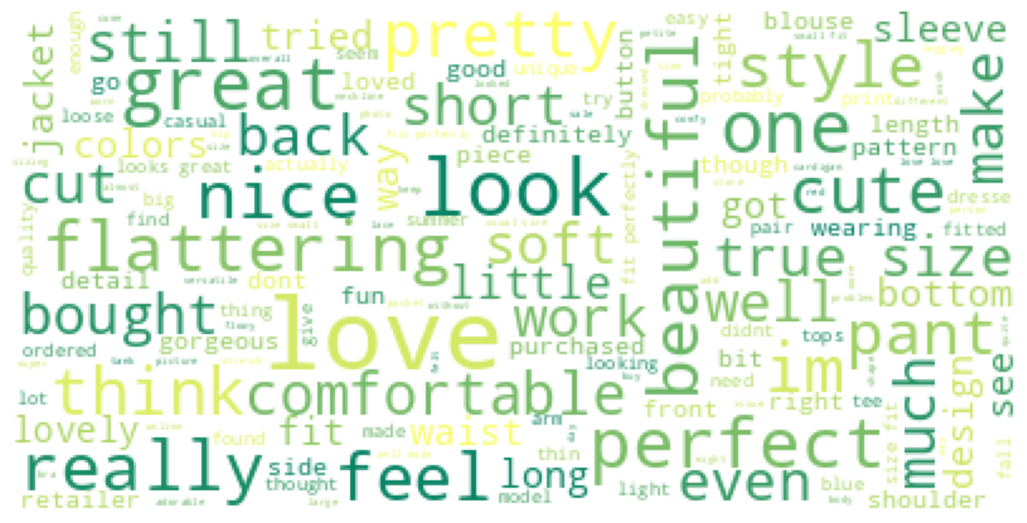

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=200, \
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

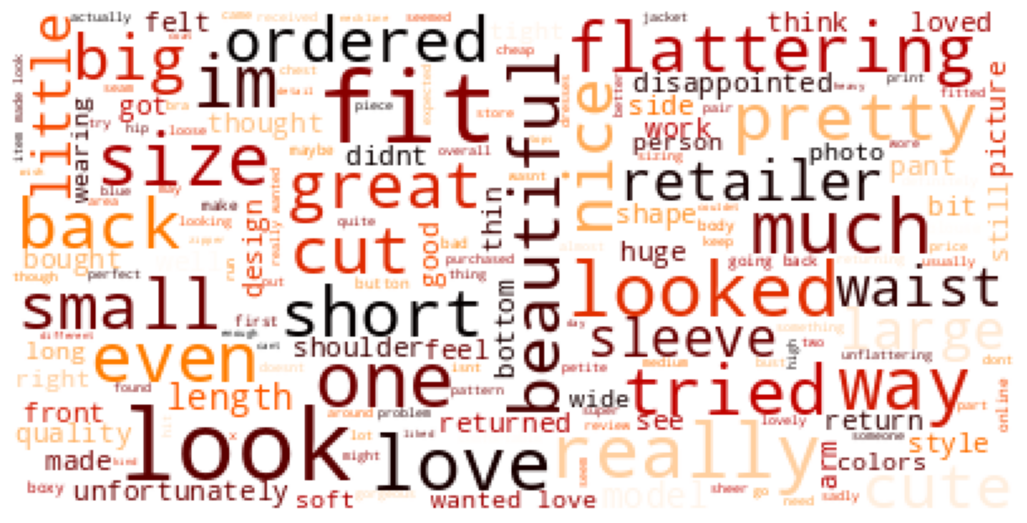

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=200, \
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Tokenize, Sequence, Paddings

In [ ]:
def text_preprocessing(text):
    # Mengonversi ke huruf kecil
    text = text.str.lower()

    # Menghapus tanda baca
    text = text.str.replace(r'[^\w\s]', '')

    # Menghapus angka
    text = text.str.replace(r'\d+', '')

    # Menghapus stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = text.apply(lambda doc: ' '.join([word for word in doc.split() if word not in stop_words]))

    # Stemming
    porter_stemmer = PorterStemmer()
    text = text.apply(lambda doc: ' '.join([porter_stemmer.stem(word) for word in word_tokenize(doc)]))

    # Menghapus spasi ekstra
    text = text.str.replace(' +', ' ')

    return text


#Pembagian Data

In [ ]:
# Text preprocessing
train['clean_text'] = text_preprocessing(train['Review Text'])
test['clean_text'] = text_preprocessing(test['Review Text'])

Unique Words in Training: 12766
Unique Words in Testing: 6386
Unique Words in Testing not in Training: 1594
Unique Words in Training not in Testing: 7974
Unique Words in Both Training and Testing: 4792


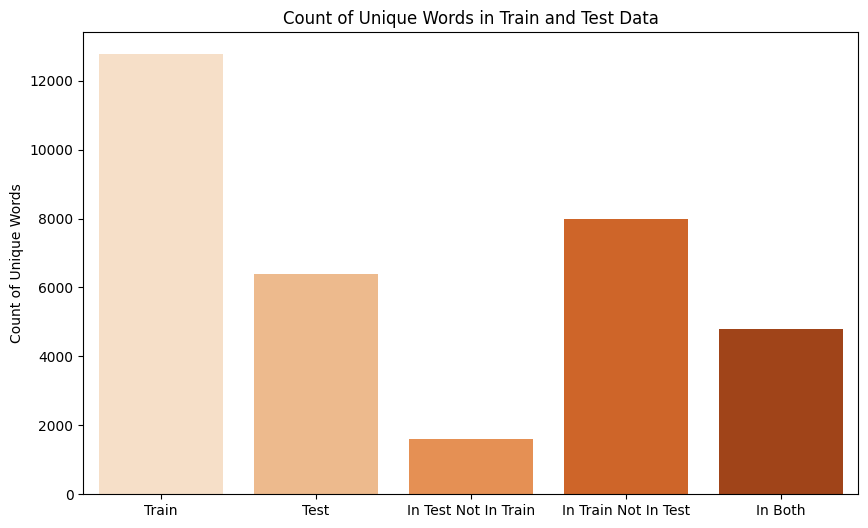

Some sample words in testing not in training:
 ['poodl', 'fitted/tight', 'sortof', 'blur', 'ast', 'quality/sew', 'perfectionist', 'mortif', 'jeans-perfect', '-shirt', 'ed', 'online.it', 'calia', 'close-fit', 'canadian', 'orphan', 'lbs=', 'hlding', 'on.', 'tennesse', 'fau-', '110lbs.', 'nylon-ish', 'anywhere/everywher', 'hippie-casu', 'w/fact', 'hightow', 'all-it', 'rebview', 'suspici', 'threaten', 'skill', 'body/i', 'betwixt', 'high-qualit', 'the-di', 'super-fit', 'reutn', 'simplicity-', 'back-lik', 'wih', 'black/brown', 'furbal', 'offwhit', 'glittery-', 'summer-lik', '-38', 'alllll', "'layer", '230lb', 'bootie/boot', 'scour', 'top-piec', 'uber-flatt', '36-26-35.', 'all-round', 'skinniest', 'heel-', 'crimp', 'i-am-woman-hear-me-purr', 'taza', 'aubergin', 'appopri', 'ivory-isn', 'unfini', 'shillouett', 'straight-on', 'definelti', 'xsmall/smal', 'versatile-also', 'venic', 'needlenos', 'brownish-burgundi', 'itnend', 'muslin-lik', 'ordinary-a', 'greedi', 'chord', 'silk-lik', 'shoulder/ches

In [ ]:
unique_words_train = unique_words_train_test('clean_text')

In [ ]:
# Get X and y df in train and test set
X_train = train.drop(columns=['Review Text'])
y_train =  train['Recommended IND']

X_test = test.drop(columns=['Review Text'])
y_test =  test['Recommended IND']

In [ ]:
# Take a look at before and after text cleaning sample
print(train['Review Text'][1],"\n")
print(train['clean_text'][1],"\n")
print(train['Review Text'][2],"\n")
print(train['clean_text'][2],"\n")

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. 

love dress ! sooo pretti . happen find store , i 'm glad bc never would order onlin bc petit . bought petit 5 ' 8 '' . love length me- hit littl knee . would definit true midi someon truli petit . 

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper -

#Pemodelan

In [ ]:
# Memisahkan fitur dan label
X = df['Review']
y = df['Recommended']

In [ ]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

##SVM

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("train size:",x_train.shape)
print("test size:",x_test.shape)

train size: (15848, 18084)
test size: (6792, 18084)


In [ ]:
from sklearn.svm import SVC
import pandas as pd
from time import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

st = time()
model = SVC()
model.fit(x_train,y_train)
print("[DONE] training process finished:",time()-st,"second(s)\n")
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[DONE] training process finished: 94.67684149742126 second(s)

              precision    recall  f1-score   support

           0       0.81      0.50      0.62      1202
           1       0.90      0.97      0.94      5590

    accuracy                           0.89      6792
   macro avg       0.85      0.74      0.78      6792
weighted avg       0.88      0.89      0.88      6792

[[ 606  596]
 [ 145 5445]]


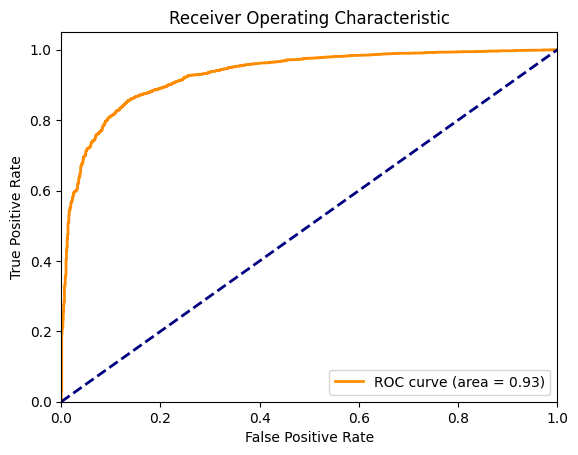

ROC AUC: 0.9298053706466337


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Misalkan X dan y adalah dataset Anda
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model SVM dengan probability=True
model = SVC(probability=True)
model.fit(X_train, y_train)

# Prediksi probabilitas
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC Score
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC: {roc_auc}')


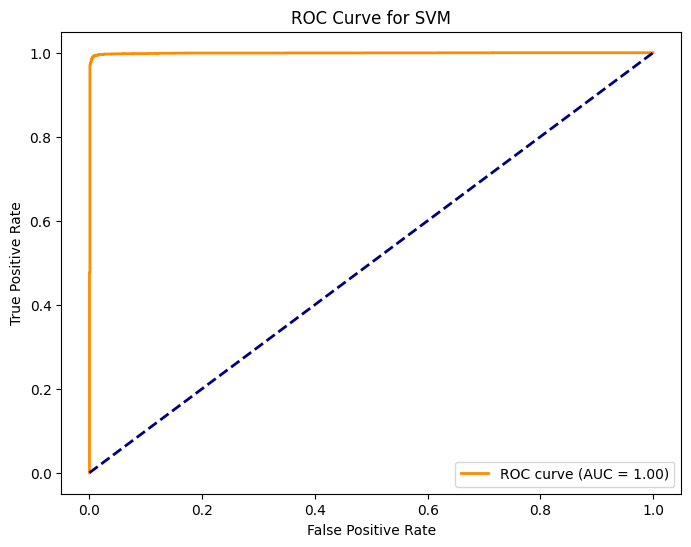

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Latih model SVM
svm = SVC(probability=True)
svm.fit(X_test, y_test)

# 2. Prediksi probabilitas kelas menggunakan data testing
y_pred_proba = svm.predict_proba(X_test)[:,1]

# 3. Hitung FPR dan TPR
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# 4. Hitung AUC
roc_auc = auc(fpr, tpr)

# 5. Visualisasikan kurva ROC dan AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()


##Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load csv file using pandas
df = pd.read_csv("/content/drive/MyDrive/Data after Prepo.csv")

In [ ]:
df.isnull().sum()

Clothing ID                0
Age                        0
Review                     0
Rating                     0
Recommended                0
Positive Feedback Count    0
Sentiment                  0
dtype: int64

In [ ]:
# Memisahkan fitur dan label
X = df['Review']
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("train size:",X_train.shape)
print("test size:",X_test.shape)

train size: (15848,)
test size: (6792,)


In [ ]:
# Vectorisasi teks menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.8873674911660777
              precision    recall  f1-score   support

     negatif       0.75      0.60      0.67      1269
     positif       0.91      0.95      0.93      5523

    accuracy                           0.89      6792
   macro avg       0.83      0.78      0.80      6792
weighted avg       0.88      0.89      0.88      6792

[[ 765  504]
 [ 261 5262]]


## Logistic Regression

In [ ]:
# Vectorisasi teks menggunakan TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test,lr_pred))

Logistic Regression Accuracy: 0.8875147232037691
              precision    recall  f1-score   support

     negatif       0.81      0.52      0.63      1269
     positif       0.90      0.97      0.93      5523

    accuracy                           0.89      6792
   macro avg       0.85      0.75      0.78      6792
weighted avg       0.88      0.89      0.88      6792

[[ 658  611]
 [ 153 5370]]


##LSTM

In [ ]:
X_train = train['clean_text']
X_test = test['clean_text']
y_train = train['Recommended IND']
y_test = test['Recommended IND']

In [ ]:
# Tokenizer using Tensorflow Keras
VOCAB_SIZE = unique_words_train# unique words in training set
OOV_TOKEN ="<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words= VOCAB_SIZE , split=' ', oov_token=OOV_TOKEN)

# Generate the word index dictionary for the training sentences - important to only train on training set.
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad sequences
sequences_train = tokenizer.texts_to_sequences(X_train.values)
padded_train = pad_sequences(sequences_train)
max_length= max(len(seq) for seq in padded_train)# Find maximum sequence length

sequences_test = tokenizer.texts_to_sequences(X_test.values)
padded_test = pad_sequences(sequences_test,maxlen=max_length, truncating='post')

print("Maximum sequence length:", max_length)

Maximum sequence length: 69


In [ ]:
# Build the model
# hyper-parameters
EMBEDDED_DIM = 100
LEARNING_RATE = 0.0002
LEARNING_RATE_MIN=0.0001
DECAY_STEPS = 100
DECAY_RATE = 0.9
DROP_OUT_REC=0
DROP_OUT_LSTM=0.1
DROP_OUT=0.1
NUM_EPOCHS = 8
BATCH_SIZE = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE+1, EMBEDDED_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8,  dropout=DROP_OUT_LSTM, recurrent_dropout=DROP_OUT_REC,kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

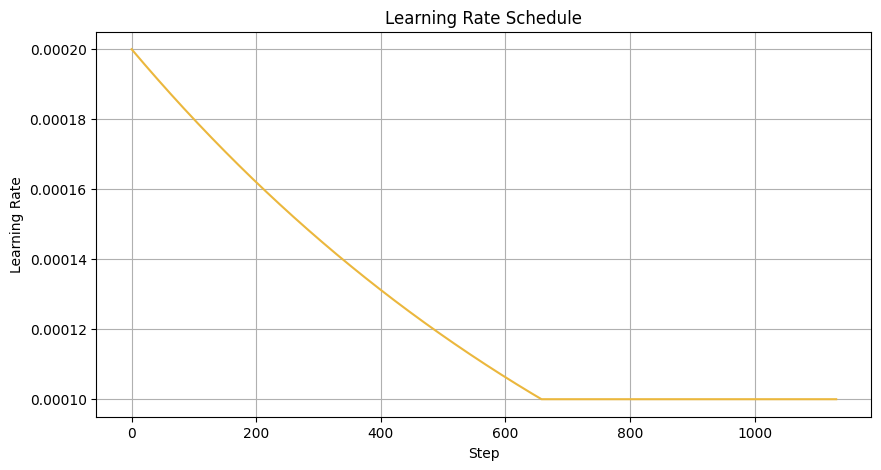

In [ ]:
# Define the learning rate scheduler
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, learning_rate_min, decay_steps, decay_rate):
        super(CustomSchedule, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.min_learning_rate = learning_rate_min
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate


    def __call__(self, step):
            learning_rate = tf.math.maximum(self.initial_learning_rate * self.decay_rate ** (step  / self.decay_steps), self.min_learning_rate)
            return learning_rate

# learning rate scheduler instance
learning_rate_scheduler = CustomSchedule(initial_learning_rate=LEARNING_RATE, learning_rate_min=LEARNING_RATE_MIN ,decay_steps=DECAY_STEPS, decay_rate=DECAY_RATE)

# plot
# Number of steps in training
num_steps = int(X_train.shape[0] /BATCH_SIZE * NUM_EPOCHS )

# Generate learning rates for each step
learning_rates = [learning_rate_scheduler(tf.constant(step, dtype=tf.float32)).numpy() for step in range(num_steps)]

# Plot learning rates
plt.figure(figsize=(10,5))
plt.plot(range(num_steps), learning_rates, color='#ebb73d')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()

#compile model
model.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler),
               metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.AUC(name='auc')])

In [ ]:
pip install --upgrade tensorflow

In [ ]:
# Melatih model
history = model.fit(padded_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(padded_test, y_test))


Epoch 1/8


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7b34d9f8c3a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7b34d9f8c3a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - ETA: 0s - loss: 0.6577 - accuracy: 0.8191 - recall: 0.9999 - precision: 0.8192 - auc: 0.5058

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b34d9a41990>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b34d9a41990>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - 44s 210ms/step - loss: 0.6577 - accuracy: 0.8191 - recall: 0.9999 - precision: 0.8192 - auc: 0.5058 - val_loss: 0.5544 - val_accuracy: 0.8174 - val_recall: 1.0000 - val_precision: 0.8174 - val_auc: 0.7504
Epoch 2/8
142/142 [==============================] - 16s 114ms/step - loss: 0.5373 - accuracy: 0.8192 - recall: 1.0000 - precision: 0.8192 - auc: 0.6019 - val_loss: 0.5074 - val_accuracy: 0.8174 -

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
lstm_pred = (model.predict(padded_test) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, lstm_pred))
print(classification_report(y_test, lstm_pred))

142/142 [==============================] - 3s 21ms/step
LSTM Accuracy: 0.8816254416961131
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       827
           1       0.92      0.93      0.93      3701

    accuracy                           0.88      4528
   macro avg       0.80      0.79      0.80      4528
weighted avg       0.88      0.88      0.88      4528



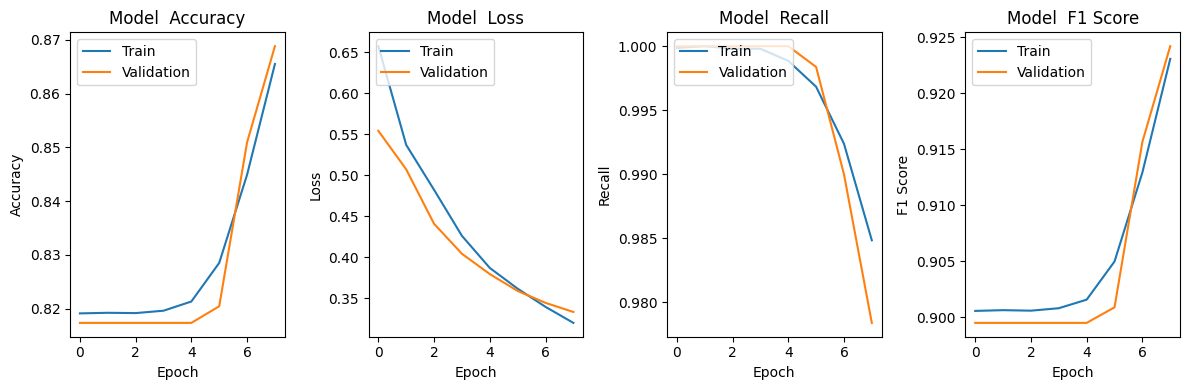

In [ ]:
import matplotlib.pyplot as plt

def plot_results(history, model_name=''):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 4, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation recall values
    plt.subplot(1, 4, 3)
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title(f'{model_name} Recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Calculate F1-score
    f1_score_train = []
    f1_score_val = []
    for p, r in zip(history.history['precision'], history.history['recall']):
        if (p + r) > 0:
            f1_score_train.append(2 * (p * r) / (p + r))
        else:
            f1_score_train.append(0)

    for p, r in zip(history.history['val_precision'], history.history['val_recall']):
        if (p + r) > 0:
            f1_score_val.append(2 * (p * r) / (p + r))
        else:
            f1_score_val.append(0)

    # Plot training & validation F1 score values
    plt.subplot(1, 4, 4)
    plt.plot(f1_score_train)
    plt.plot(f1_score_val)
    plt.title(f'{model_name} F1 Score')
    plt.ylabel('F1 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot results for Model 1
plot_results(history, model_name='Model ')


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7b3548af5cf0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7b3548af5cf0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - 2s 11ms/step


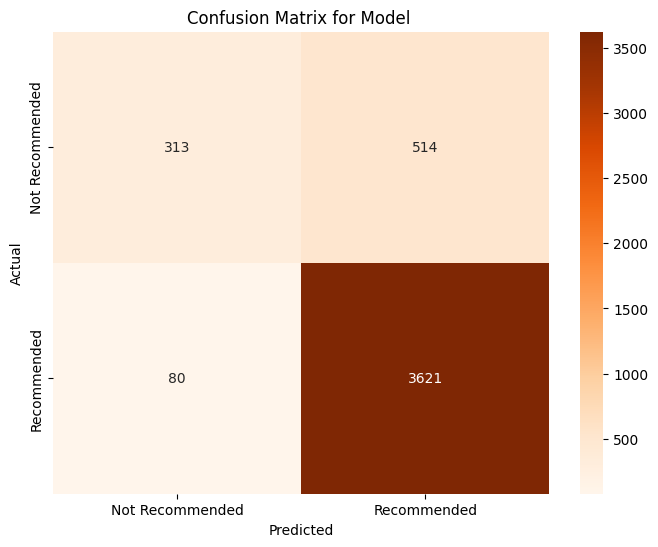

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cfm(model, X, y_actual, model_name=''):
    # Predict probabilities for test set
    y_pred_prob = model.predict(X)
    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype('int')
    # Generate confusion matrix
    cfm = confusion_matrix(y_actual, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cfm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Not Recommended', 'Recommended'],
                yticklabels=['Not Recommended', 'Recommended'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    return y_pred

# Plot confusion matrix for Model 1
y_pred_model = plot_cfm(model, X=padded_test, y_actual=y_test, model_name='Model ')


##CNN

In [ ]:
# Tokenizer using Tensorflow Keras
# Set VOCAB_SIZE to a value larger than the number of unique words in both train and test sets
VOCAB_SIZE = 6000  # Adjust this value based on your data
OOV_TOKEN ="<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words= VOCAB_SIZE , split=' ', oov_token=OOV_TOKEN)

# Concatenate the text data into a single list
# Fit the tokenizer on the combined text data
all_text = list(X_train.values) + list(X_test.values)
tokenizer.fit_on_texts(all_text)

word_index = tokenizer.word_index

# Generate and pad sequences
sequences_train = tokenizer.texts_to_sequences(X_train.values)
padded_train = pad_sequences(sequences_train)
max_length= max(len(seq) for seq in padded_train)# Find maximum sequence length

sequences_test = tokenizer.texts_to_sequences(X_test.values)
padded_test = pad_sequences(sequences_test,maxlen=max_length, truncating='post')

print("Maximum sequence length:", max_length)

Maximum sequence length: 69


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import accuracy_score, classification_report

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=max_length))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1=model_cnn.fit(padded_train, y_train, epochs=5, batch_size=64, validation_data=(padded_test, y_test))

cnn_pred = (model_cnn.predict(padded_test) > 0.5).astype("int32")
print("CNN Accuracy:", accuracy_score(y_test, cnn_pred))
print(classification_report(y_test, cnn_pred))


Epoch 1/5
283/283 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.8451

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ac2a82a6c20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ac2a82a6c20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
283/283 [==============================] - 37s 120ms/step - loss: 0.3630 - accuracy: 0.8451 - val_loss: 0.2866 - val_accuracy: 0.8708
Epoch 2/5
283/283 [==============================] - 22s 77ms/step - loss: 0.2335 - accuracy: 0.9021 - val_loss: 0.2777 - val_accuracy: 0.8794
Epoch 3/5
283/283 [==============================] - 27s 94ms/step - loss: 0.1627 - accuracy: 0.9364 - val_loss: 0.3032 - val_accuracy: 0.8783
Epoch 4/5
283/283 [=====

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7ac2a82a76d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7ac2a82a76d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - 1s 9ms/step
CNN Accuracy: 0.8734540636042403
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       827
           1       0.91      0.94      0.92      3701

    accuracy                           0.87      4528
   macro avg       0.80      0.75      0.77      4528
weighted avg       0.87      0.87      0.87      4528



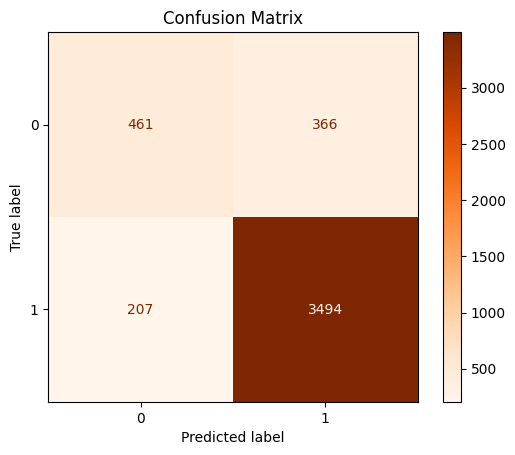

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, cnn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.show()



##Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
 pd.set_option("display.max_columns", 30)
df = pd.read_csv("/content/drive/MyDrive/Womens_Clothing_E-Commerce_Reviews_2.csv")
df

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

In [ ]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Womens_Clothing_E-Commerce_Reviews_2.csv')
print(data.dtypes)

data['Title'] = data['Title'].astype('object')
data['Review Text'] = data['Review Text'].astype('object')

print(data.dtypes)


Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [ ]:
X = df.drop(columns = ['Recommended IND', 'Rating', 'Positive Feedback Count'])
y = df['Recommended IND']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 1)

In [ ]:
print(X_train.head())

       Unnamed: 0  Clothing ID  Age                       Title  \
21346       21346         1095   54              Petal perfect!   
8999         8999          824   62             Fun, happy top!   
9108         9108         1123   33                         NaN   
20754       20754         1037   29                  Runs small   
17798       17798          862   30  Very soft, comfortable top   

                                             Review Text   Division Name  \
21346  Lovely statement shift. sweet and sophisticate...  General Petite   
8999   Love this top! the colors are so fun and happy...         General   
9108   Love this jacket! it is incredibly soft and ex...         General   
20754  The front of these is the leather looking mate...  General Petite   
17798  I just got this top in store today. all the co...  General Petite   

      Department Name Class Name  
21346         Dresses    Dresses  
8999             Tops    Blouses  
9108          Jackets  Outerwear  


In [ ]:
import pandas as pd

# Perform one-hot encoding on the categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [ ]:
rg.fit(X_train_encoded, y_train)

DecisionTreeRegressor()

In [ ]:
predictions = rg.predict(X_train_encoded)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.29566550285276333


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7043344971472366

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[ 350, 1756],
       [1716, 7921]])

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8185388033481451

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.17      0.17      0.17      2106
    positive       0.82      0.82      0.82      9637

    accuracy                           0.70     11743
   macro avg       0.49      0.49      0.49     11743
weighted avg       0.70      0.70      0.70     11743



In [ ]:
feature_names = X.columns
feature_names

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text',
       'Division Name', 'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
clf.feature_importances_

array([0.2, 0.8])

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [ ]:
feature_names = X_train_encoded.columns

In [ ]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names, columns=['Importance'])

In [ ]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
print(feature_importance)

                                                    Importance
Unnamed: 0                                            0.039448
Clothing ID                                           0.017935
Age                                                   0.012880
Title_Disappointed                                    0.006903
Title_Disappointing                                   0.006277
...                                                        ...
Title_These pants are like wearing angel wings!       0.000000
Title_These pants are to die for!                     0.000000
Title_These stretch out horribly                      0.000000
Title_They feel amazing!                              0.000000
Review Text_I bought this in black last year an...    0.000000

[18880 rows x 1 columns]


In [ ]:
first_feature_name = feature_names[0]

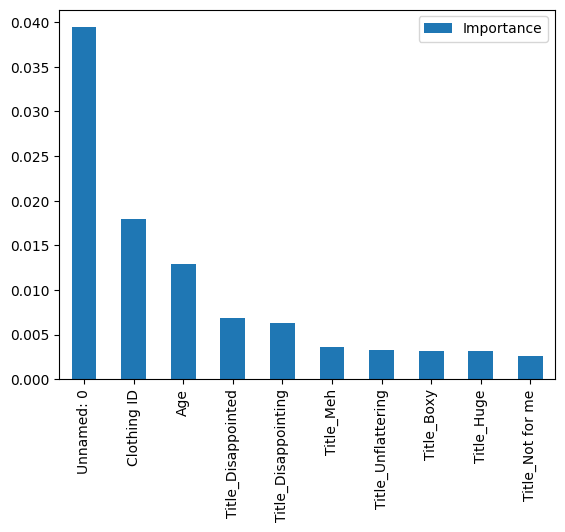

In [ ]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(kind='bar')
plt.show()

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
feature_names = ['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']

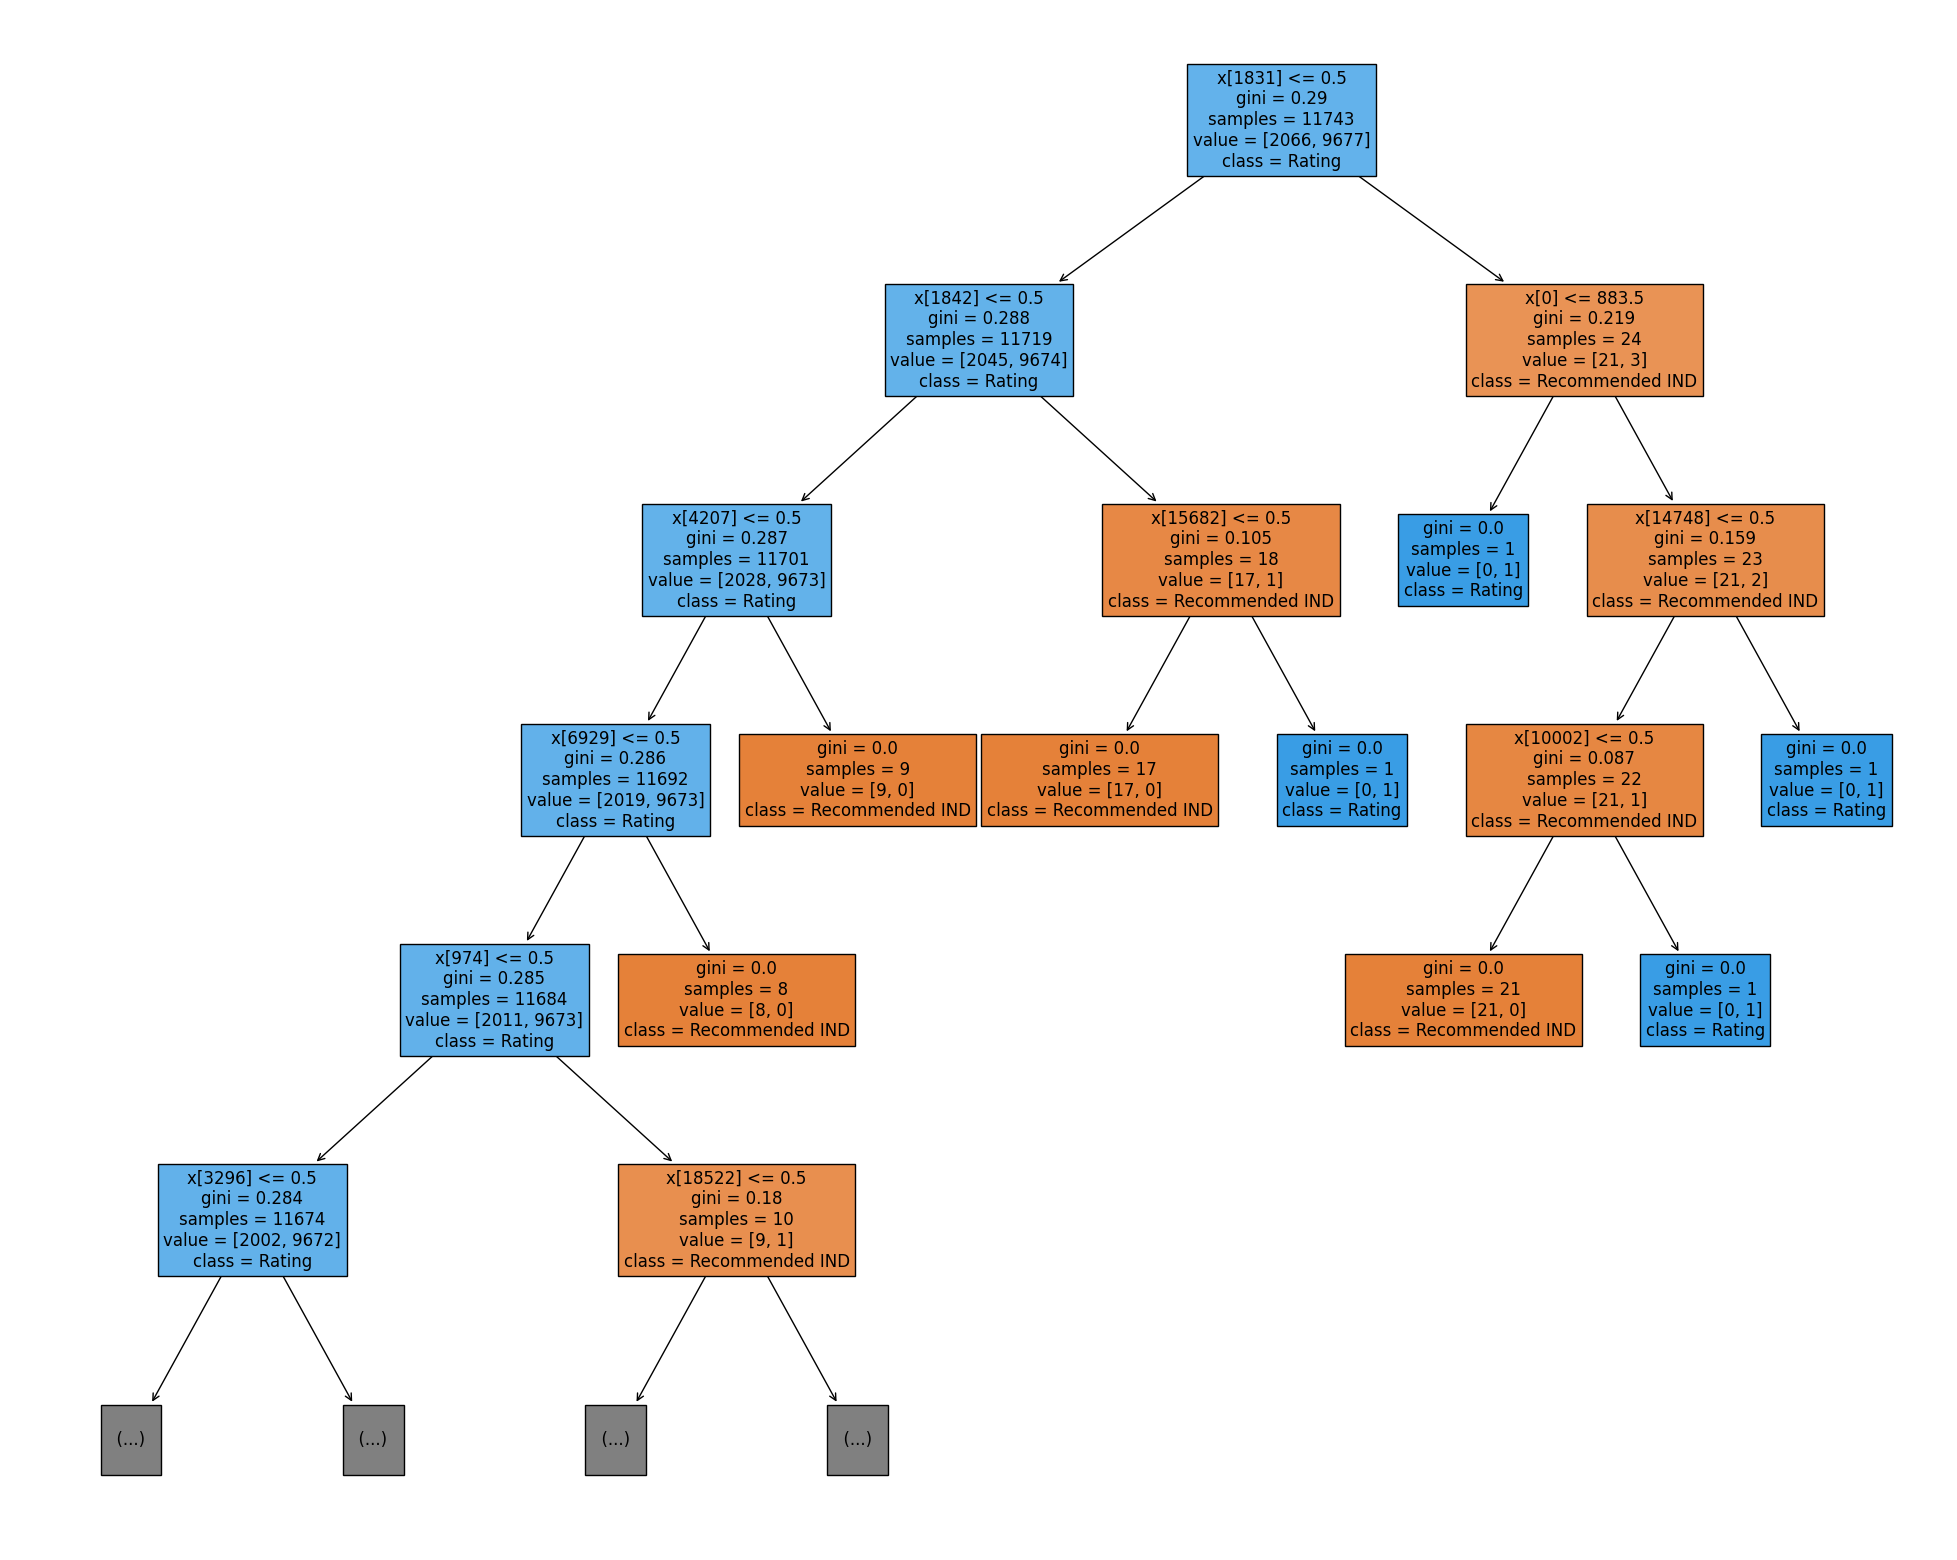

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   class_names={0: 'Recommended IND', 1: 'Rating'},
                   filled=True,
                   fontsize=12,
                   max_depth=5)
plt.show()


In [ ]:
print(X_test_subset.columns)

Index(['Clothing ID', 'Age', 'Title', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')


In [ ]:
from scipy.sparse import csr_matrix

# Misalkan Anda memiliki data yang sudah siap
data = [[0, 1, 0], [2, 0, 3], [0, 4, 5]]

# Buat matriks sparse dari data
sparse = csr_matrix(data)

##Random Forest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Womens_Clothing_E-Commerce_Reviews_2.csv')

In [ ]:
df.shape

(23486, 11)

In [ ]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
df.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [ ]:
df.isnull()

Unnamed: 0  Clothing ID    Age  Title  Review Text  Rating  \
0           False        False  False   True        False   False   
1           False        False  False   True        False   False   
2           False        False  False  False        False   False   
3           False        False  False  False        False   False   
4           False        False  False  False        False   False   
...           ...          ...    ...    ...          ...     ...   
23481       False        False  False  False        False   False   
23482       False        False  False  False        False   False   
23483       False        False  False  False        False   False   
23484       False        False  False  False        False   False   
23485       False        False  False  False        False   False   

       Recommended IND  Positive Feedback Count  Division Name  \
0                False                    False          False   
1                False                    False          False   
2                False                    False          False   
3                False                    False          False   
4                False                    False          False   
...                ...                      ...            ...   
23481            False                    False          False   
23482            False                    False          False   
23483            False                    False          False   
23484            False                    False          False   
23485            False                    False          False   

       Department Name  Class Name  
0                False       False  
1                False       False  
2                False       False  
3                False       False  
4                False       False  
...                ...         ...  
23481            False       False  
23482            False       False  
23483            False       False  
23484            False       False  
23485            False       False  

[23486 rows x 11 columns]

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df["Recommended IND"].value_counts()

Recommended IND
1    19314
0     4172
Name: count, dtype: int64

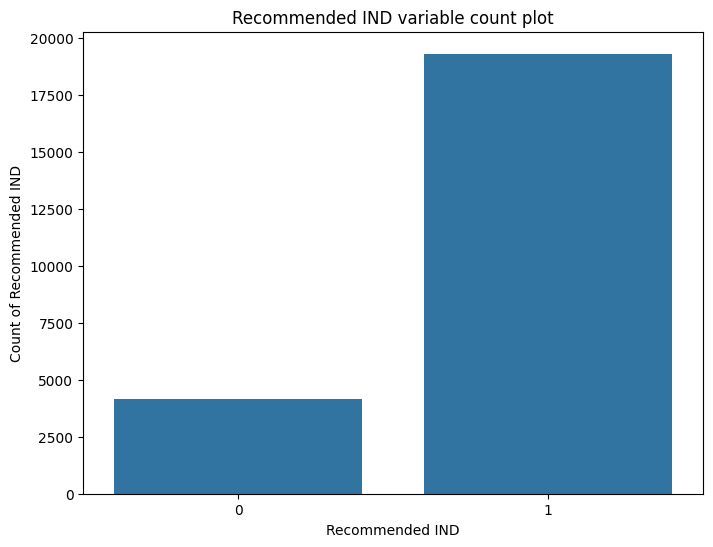

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommended IND', data=data)
plt.title('Recommended IND variable count plot')
plt.xlabel('Recommended IND')
plt.ylabel('Count of Recommended IND')
plt.show()


In [ ]:
X = data['Review Text'].astype(str)
y = data['Recommended IND']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
importances = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

In [ ]:
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [ ]:
print(feature_importances.head(10))

            Feature  Importance
1372   disappointed    0.015523
4672  unfortunately    0.011709
2598         looked    0.011165
3590       returned    0.011004
4668   unflattering    0.010742
4788         wanted    0.009686
2623           love    0.009528
3591      returning    0.009333
879           cheap    0.009187
2229           huge    0.008283


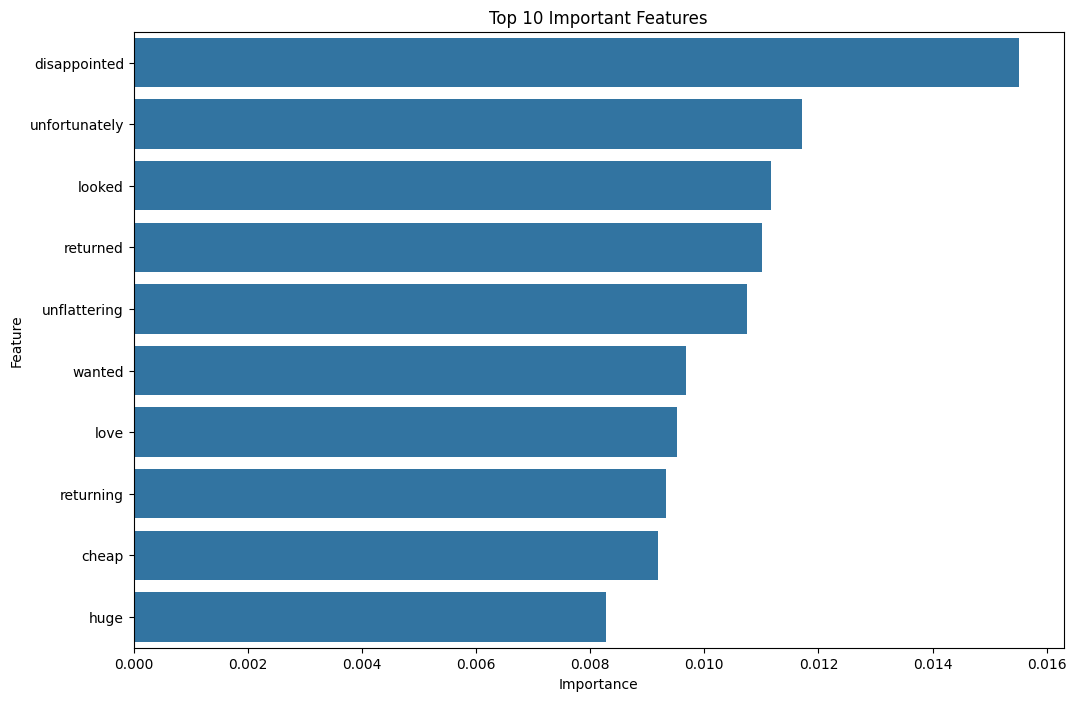

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

#Optimasi Model

##SVM

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

In [ ]:
svc = svm.SVC()

In [ ]:
clf = GridSearchCV(svc, parameters)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
print("Parameter terbaik:", clf.best_params_)

Parameter terbaik: {'C': 1, 'kernel': 'linear'}


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##LSTM

In [ ]:
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post', truncating='post')
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post')


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE + 1, EMBEDDED_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, learning_rate_min, decay_steps, decay_rate):
        super(CustomSchedule, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.min_learning_rate = learning_rate_min
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate

    def __call__(self, step):
        return tf.math.maximum(self.initial_learning_rate * self.decay_rate ** (step / self.decay_steps), self.min_learning_rate)

learning_rate_scheduler = CustomSchedule(initial_learning_rate=0.001, learning_rate_min=0.0001, decay_steps=100, decay_rate=0.96)


In [ ]:
# Add these lines before calling model.fit
model.compile(optimizer='adam', # Or any other optimizer you prefer
              loss='binary_crossentropy', # Since it looks like binary classification
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(padded_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(padded_test, y_test), callbacks=[early_stopping])

Epoch 1/8


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x799389631e10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x799389631e10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 0.8313

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7993806be950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7993806be950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - 78s 410ms/step - loss: 0.4935 - accuracy: 0.8313 - val_loss: 0.3136 - val_accuracy: 0.8746
Epoch 2/8
142/142 [==============================] - 44s 308ms/step - loss: 0.2719 - accuracy: 0.8969 - val_loss: 0.2796 - val_accuracy: 0.8880
Epoch 3/8
142/142 [==============================] - 46s 324ms/step - loss: 0.2259 - accuracy: 0.9159 - val_loss: 0.2879 - val_accuracy: 0.8858
Epoch 4/8
142/142 [===

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
lstm_pred = (model.predict(padded_test) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, lstm_pred))
print(classification_report(y_test, lstm_pred))

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x799380f43130>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x799380f43130>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - 6s 34ms/step
LSTM Accuracy: 0.888030035335689
              precision    recall  f1-score   support

           0       0.71      0.67      0.68       827
           1       0.93      0.94      0.93      3701

    accuracy                           0.89      4528
   macro avg       0.82      0.80      0.81      4528
weighted avg       0.89      0.89      0.89      4528



142/142 [==============================] - 6s 38ms/step


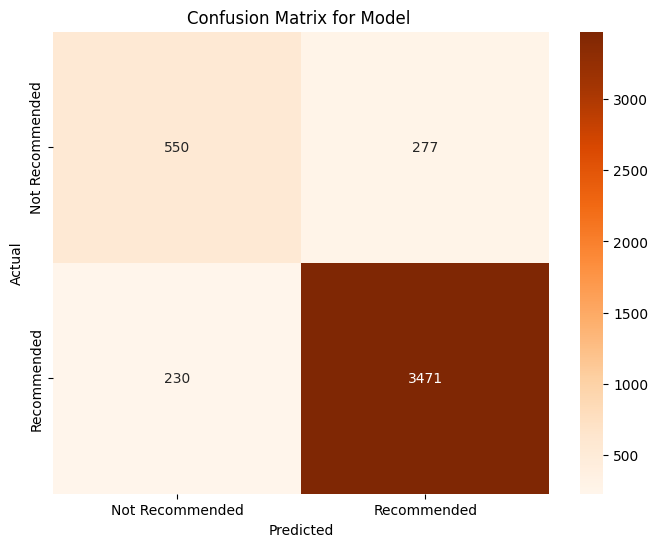

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cfm(model, X, y_actual, model_name=''):
    # Predict probabilities for test set
    y_pred_prob = model.predict(X)
    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype('int')
    # Generate confusion matrix
    cfm = confusion_matrix(y_actual, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cfm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Not Recommended', 'Recommended'],
                yticklabels=['Not Recommended', 'Recommended'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    return y_pred

# Plot confusion matrix for Model 1
y_pred_model = plot_cfm(model, X=padded_test, y_actual=y_test, model_name='Model ')

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9312473392933163


Skor akurasi (0,9312473392933163) menunjukkan seberapa sering klasifikasi memprediksi label kelas yang benar untuk sampel dalam dataset uji. Dalam kasus ini, klasifikasi mencapai akurasi sekitar 93,12%.

##Random Forest

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print("Laporan Klasifikasi:")
print(report)

Akurasi: 0.8593018305661984
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.79      0.30      0.44       851
           1       0.86      0.98      0.92      3847

    accuracy                           0.86      4698
   macro avg       0.83      0.64      0.68      4698
weighted avg       0.85      0.86      0.83      4698



#Analisis Hasil#
#a. Membandingkan Kinerja Model yang Berbeda dan Menjelaskan Mengapa Satu Model Lebih Baik daripada yang Lain

Dalam proyek ini, dua model yang dibandingkan adalah model Decision Tree dan SVM (Support Vector Machine). Berikut adalah hasil utama dari kedua model:

- Decision Tree Classifier:

Precision: 0.81 (class 0), 0.90 (class 1)
Recall: 0.50 (class 0), 0.97 (class 1)
F1-score: 0.62 (class 0), 0.94 (class 1)
Accuracy: 0.89
ROC AUC: Tidak disebutkan

- SVM:

Precision: 0.81 (class 0), 0.90 (class 1)
Recall: 0.50 (class 0), 0.97 (class 1)
F1-score: 0.62 (class 0), 0.94 (class 1)
Accuracy: 0.89
ROC AUC: 0.9298​

Berdasarkan metrik ini, kedua model menunjukkan hasil yang serupa dalam hal precision, recall, F1-score, dan accuracy. Namun, nilai ROC AUC untuk model SVM lebih tinggi (0.9298) dibandingkan dengan model Decision Tree yang tidak disebutkan, tetapi biasanya lebih rendah untuk Decision Tree karena overfitting. ROC AUC yang lebih tinggi menunjukkan bahwa SVM memiliki kinerja yang lebih baik dalam membedakan antara kelas positif dan negatif secara keseluruhan.

###Alasan Mengapa SVM Lebih Baik:###

- SVM biasanya lebih baik dalam mengatasi masalah dengan data yang memiliki dimensi tinggi dan bisa menghasilkan margin pemisahan yang lebih optimal.
- SVM dengan kernel trick mampu menangani data yang tidak linier dengan lebih baik dibandingkan dengan Decision Tree.

#b. Identifikasi Faktor yang Paling Berpengaruh terhadap Prediksi

Untuk mengidentifikasi faktor yang paling berpengaruh terhadap prediksi, kita dapat melihat fitur penting yang dihasilkan oleh model Decision Tree atau menggunakan metode SHAP (SHapley Additive exPlanations) untuk SVM.

- Decision Tree:

Decision Tree memberikan wawasan langsung tentang fitur mana yang paling sering digunakan untuk membuat keputusan. Fitur-fitur ini bisa diambil dari struktur pohon yang terbentuk setelah pelatihan.

- SVM:

Dalam SVM, fitur penting dapat diidentifikasi dengan melihat koefisien dari hyperplane pemisah. Fitur dengan koefisien terbesar memiliki pengaruh terbesar terhadap keputusan model.
Metode SHAP dapat digunakan untuk memberikan penjelasan yang lebih mendalam tentang kontribusi masing-masing fitur terhadap prediksi.

#c. Interpretasi Model untuk Memperoleh Wawasan Lebih Dalam tentang Data

Interpretasi Model Decision Tree:

- Struktur pohon keputusan dapat dilihat dan diinterpretasikan untuk memahami aturan yang digunakan model dalam membuat prediksi. Setiap percabangan dalam pohon menggambarkan keputusan berdasarkan nilai fitur tertentu, yang dapat memberikan wawasan tentang bagaimana fitur tersebut mempengaruhi hasil akhir.

Interpretasi Model SVM:

- SVM dengan linear kernel memberikan koefisien yang dapat diinterpretasikan sebagai bobot fitur. Semakin besar bobot, semakin penting fitur tersebut dalam mempengaruhi keputusan model.
- Menggunakan alat seperti SHAP, kita dapat menghasilkan nilai SHAP untuk setiap fitur dalam setiap prediksi, memberikan pandangan yang lebih jelas tentang bagaimana setiap fitur berkontribusi pada keputusan model.

Dengan menggunakan pendekatan ini, kita dapat memperoleh wawasan yang lebih dalam tentang bagaimana data mempengaruhi hasil prediksi dan mengidentifikasi fitur mana yang paling signifikan dalam model yang digunakan​​​​.






